In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import numpy as np
for column in df.columns:
    print(column)
    print("\n")

Year


Sl. No.


Category


State/UT


Murder with Rape/Gang Rape 


Dowry Deaths 


Abetment to Suicide of Women


Miscarriage


Acid Attack 


Cruelty by Husband or his relatives 


Kidnapping and Abduction of Women 


Human Trafficking


Rape total


Attempt to Commit Rape


Assault on Women with Intent to Outrage her Modesty 


Insult to the Modesty of Women


Dowry Prohibition Act, 1961 


Immoral Traffic (Prevention) Act, 1956 (Women Victims cases only) 


Protection of Women from Domestic Violence Act 


Cyber Crimes/Information Technology Act (Women Centric Crimes only)


Cyber Crimes Act (Women Centric Crimes only) - A) Publishing or Transmitting of Sexually Explicit Material 


Cyber Crimes Act (Women Centric Crimes only) - B) (Ex. Blackmailing/ Defamation/Morphing/ Fake Profile)


Protection of Children from Sexual Offences Act (Girl Child Victims only) 


Total Crime against Women




In [ ]:
# Ensure the 'Year' column is in the correct data type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter the data for the years 2019-2022
filtered_df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Drop the columns 'Sl. No.', 'Category', and 'State/UT'
filtered_df = filtered_df.drop(columns=['Sl. No.', 'Category', 'State/UT'])

# Group by 'Year' and perform the analysis
yearly_analysis = filtered_df.groupby('Year').sum()

# Display the year-wise analysis
print(yearly_analysis)

# Save the analysis to a CSV file
yearly_analysis.to_csv('yearly_analysis.csv')

      Murder with Rape/Gang Rape   Dowry Deaths   \
Year                                               
2017                          227           7838   
2018                          296           7277   
2019                          286           7162   
2020                          226           7045   
2021                          293           6795   
2022                          250           6516   

      Abetment to Suicide of Women  Miscarriage  Acid Attack   \
Year                                                            
2017                          5467          268           148   
2018                          5266          216           136   
2019                          5088          222           156   
2020                          5132          240           109   
2021                          5386          196           107   
2022                          5107          240           140   

      Cruelty by Husband or his relatives   \
Year            

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter the data for the years 2019-2022
filtered_df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Drop the columns 'Sl. No.', 'Category', and 'State/UT'
filtered_df = filtered_df.drop(columns=['Sl. No.', 'Category', 'State/UT'])

# Group by 'Year' and perform the analysis
yearly_analysis = filtered_df.groupby('Year').sum()

# Display the year-wise analysis
print(yearly_analysis)

# Save the analysis to a CSV file
yearly_analysis.to_csv('yearly_analysis.csv')



      Murder with Rape/Gang Rape   Dowry Deaths   \
Year                                               
2017                          227           7838   
2018                          296           7277   
2019                          286           7162   
2020                          226           7045   
2021                          293           6795   
2022                          250           6516   

      Abetment to Suicide of Women  Miscarriage  Acid Attack   \
Year                                                            
2017                          5467          268           148   
2018                          5266          216           136   
2019                          5088          222           156   
2020                          5132          240           109   
2021                          5386          196           107   
2022                          5107          240           140   

      Cruelty by Husband or his relatives   \
Year            

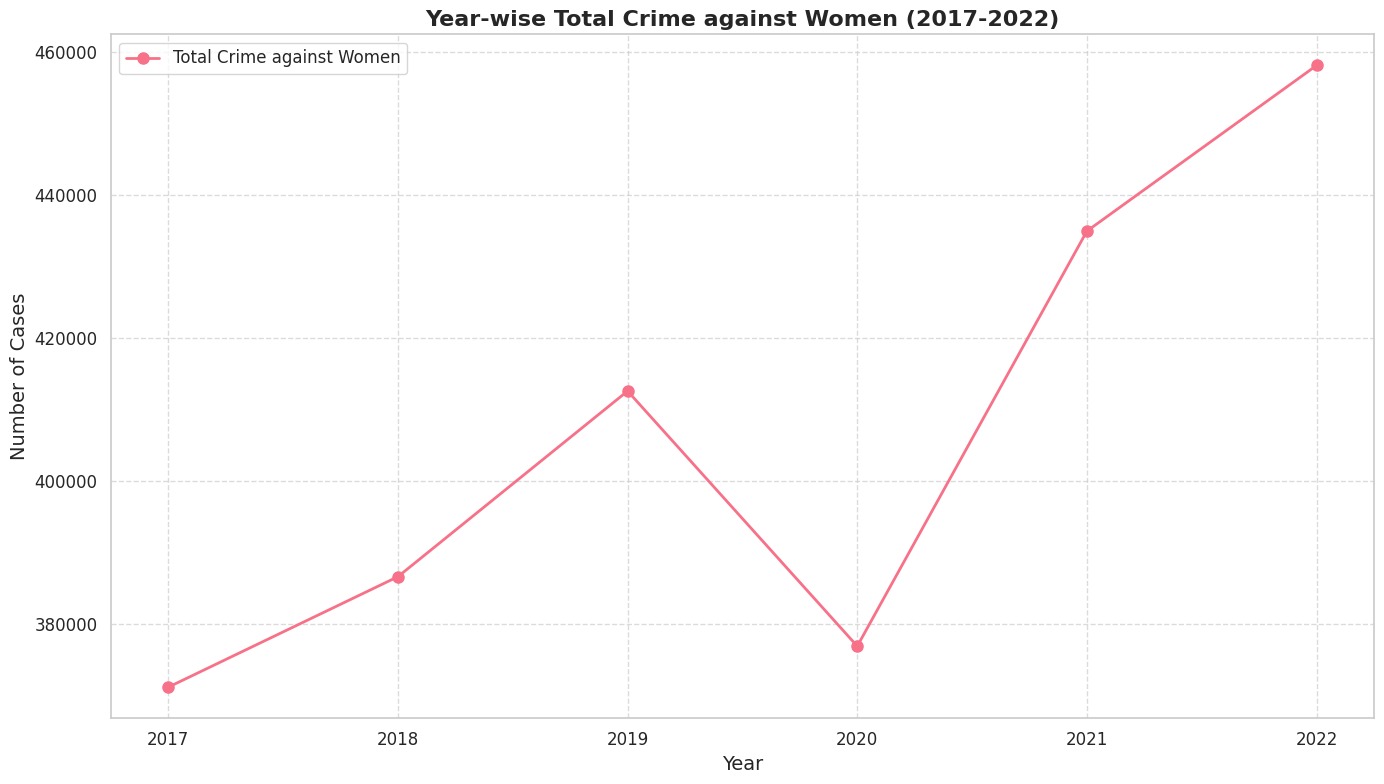

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for additional styling

# Set the style of the visualization
sns.set(style="whitegrid")

# Define color palette
colors = sns.color_palette("husl", 1)  # You can choose different palettes

# Create the figure and axis
plt.figure(figsize=(14, 8))

# Plotting the total crime against women for each year with enhanced styling
plt.plot(yearly_analysis.index, yearly_analysis['Total Crime against Women'],
         marker='o', linestyle='-', color=colors[0], linewidth=2, markersize=8, label='Total Crime against Women')

# Customize the plot
plt.title('Year-wise Total Crime against Women (2017-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_analysis.index, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('yearly_crime_analysis.png', dpi=300)

# Display the plot
plt.show()


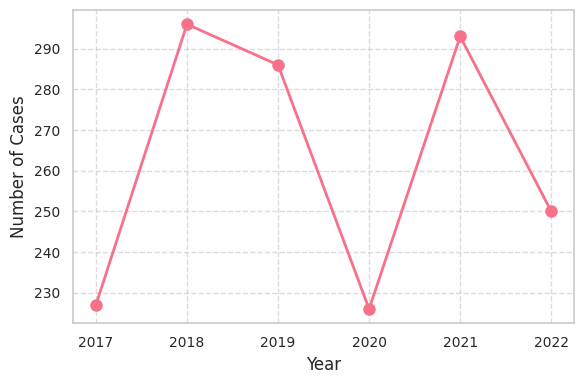

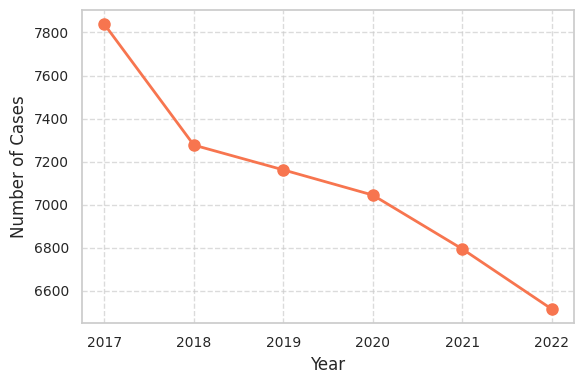

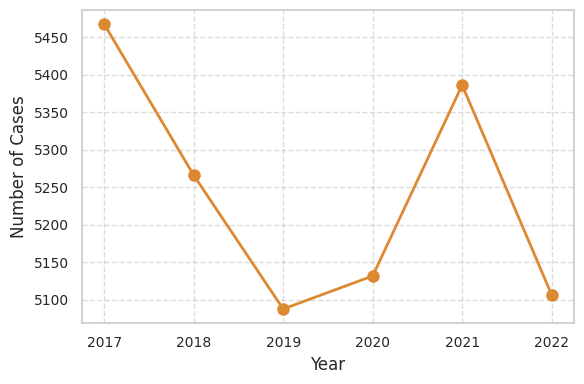

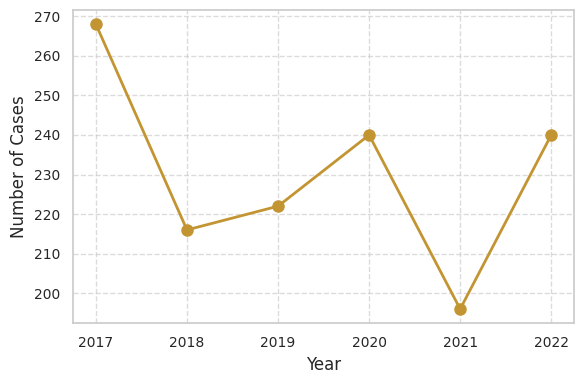

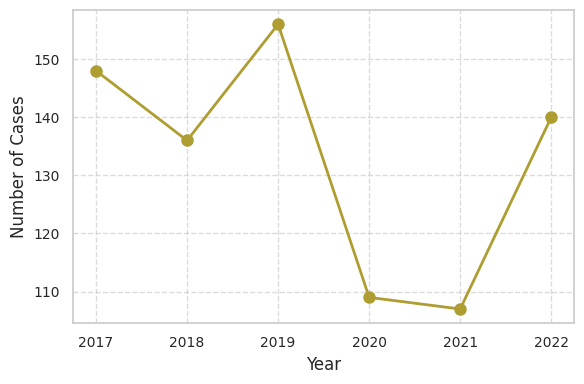

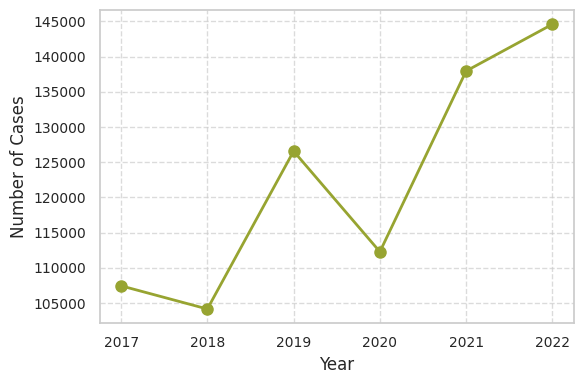

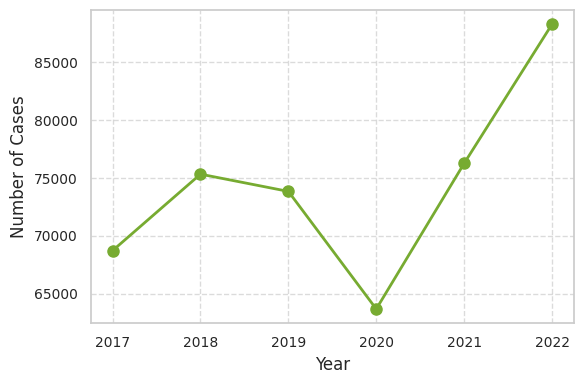

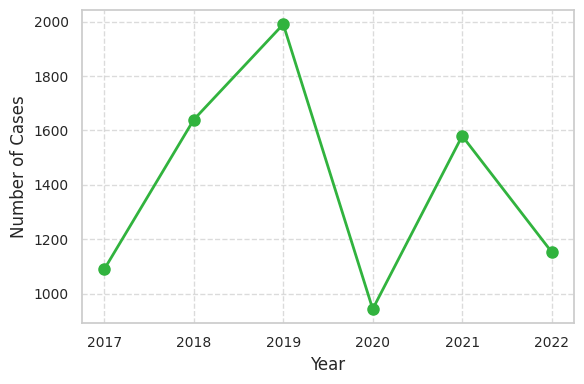

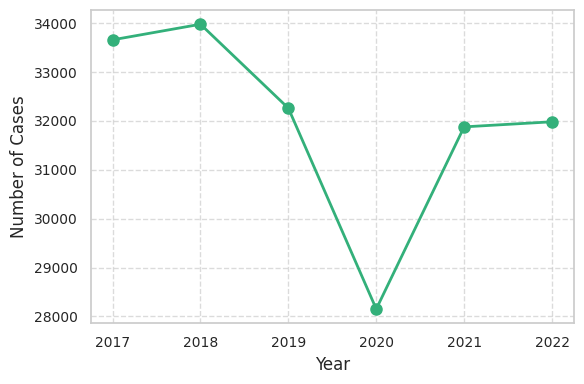

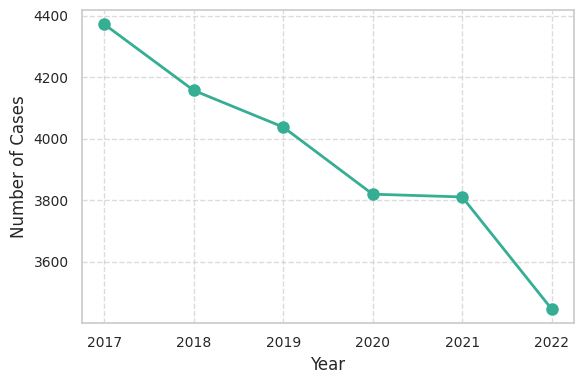

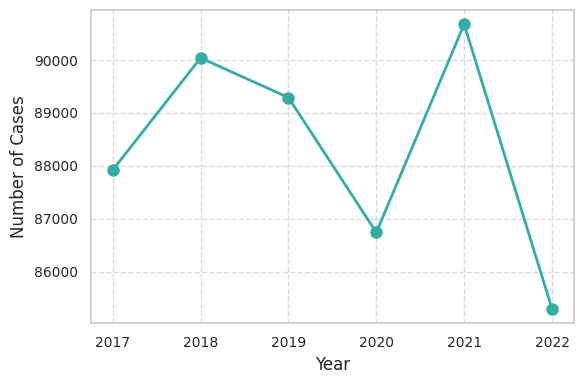

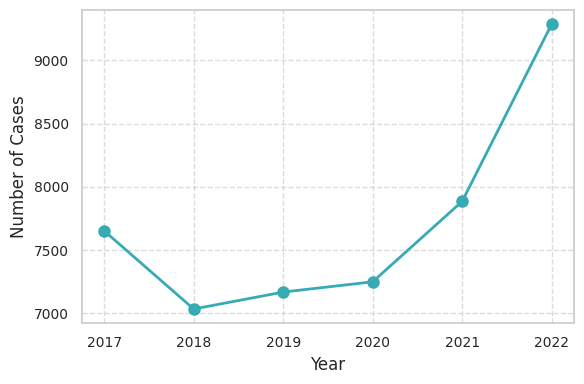

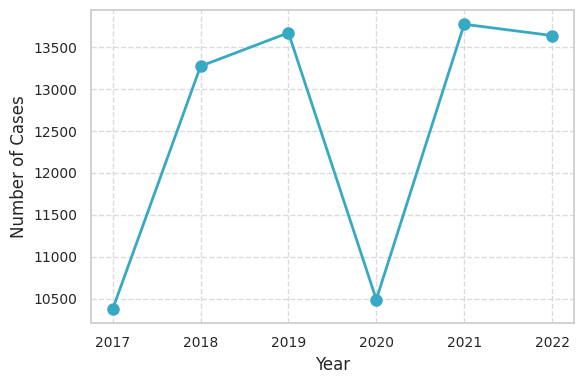

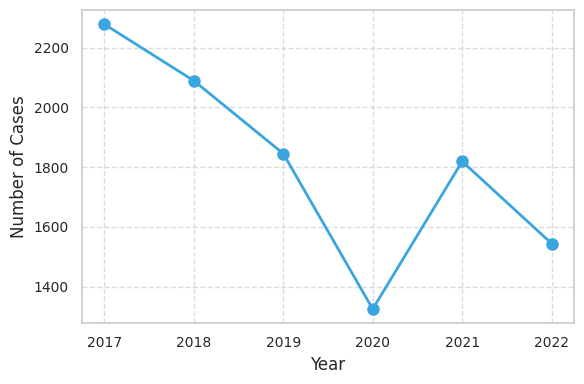

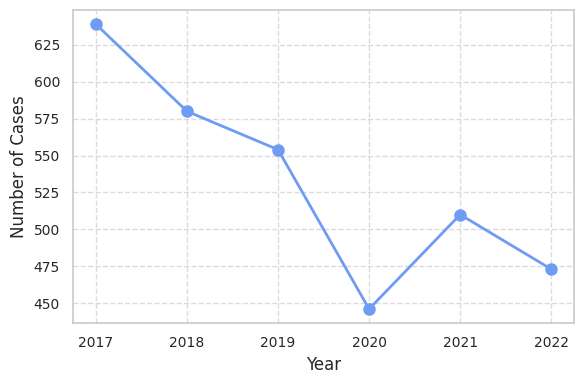

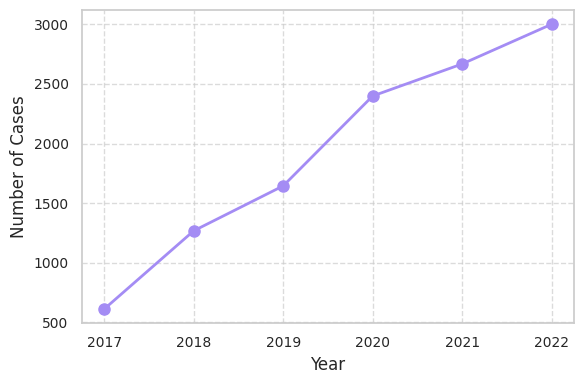

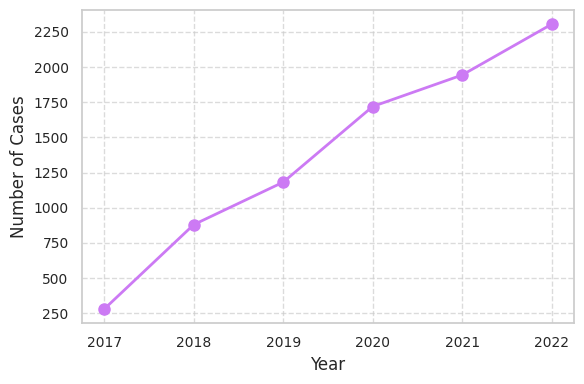

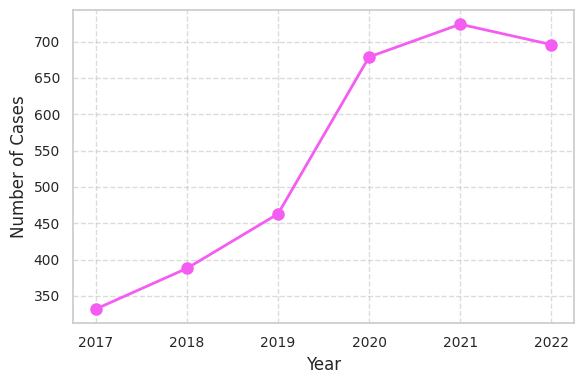

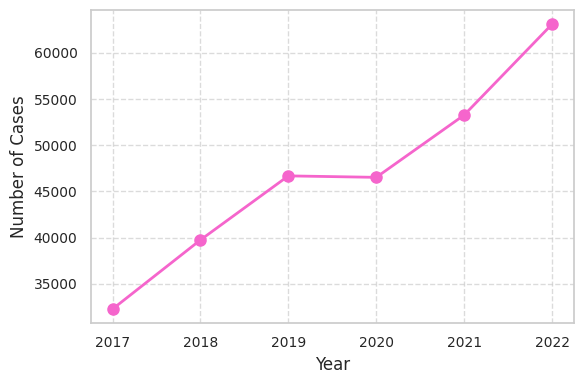

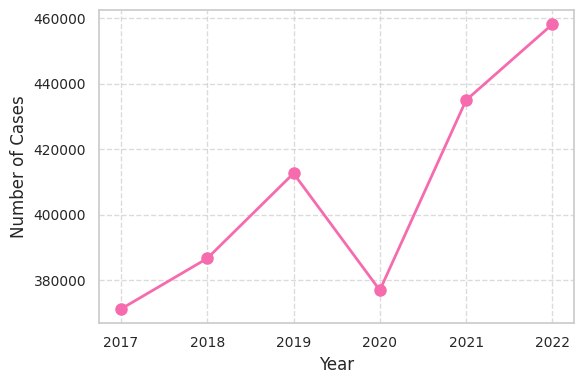

In [ ]:
# List of crime columns to plot (add or remove columns as needed)
crime_columns = [
    'Murder with Rape/Gang Rape ',
    'Dowry Deaths ',
    'Abetment to Suicide of Women',
    'Miscarriage',
    'Acid Attack ',
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Human Trafficking',
    'Rape total',
    'Attempt to Commit Rape',
    'Assault on Women with Intent to Outrage her Modesty ',
    'Insult to the Modesty of Women',
    'Dowry Prohibition Act, 1961 ',
    'Immoral Traffic (Prevention) Act, 1956 (Women Victims cases only) ',
    'Protection of Women from Domestic Violence Act ',
    'Cyber Crimes/Information Technology Act (Women Centric Crimes only)',
    'Cyber Crimes Act (Women Centric Crimes only) - A) Publishing or Transmitting of Sexually Explicit Material ',
    'Cyber Crimes Act (Women Centric Crimes only) - B) (Ex. Blackmailing/ Defamation/Morphing/ Fake Profile)',
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ',
    'Total Crime against Women'
]

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Define color palette
colors = sns.color_palette("husl", len(crime_columns))  # Adjust the number of colors based on the number of crime categories

# Plot each crime category
for i, crime in enumerate(crime_columns):
    plt.figure(figsize=(6, 4))
    plt.plot(yearly_analysis.index, yearly_analysis[crime], marker='o', linestyle='-', color=colors[i],
             linewidth=2, markersize=8, label=crime)

    # Customize the plot

    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(yearly_analysis.index, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()


    # Display the plot
    plt.show()


In [ ]:


# Ensure the 'Year' column is in the correct data type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter the data for the years 2019-2022
filtered_df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Drop the columns 'Sl. No.', 'Category', and 'State/UT'
filtered_df = filtered_df.drop(columns=['Sl. No.', 'Category', 'State/UT'])

# Group by 'Year' and perform the analysis
yearly_analysis = filtered_df.groupby('Year').sum()

# Calculate year-over-year growth rates
yearly_growth = yearly_analysis.pct_change() * 100

# Display the growth rates
print(yearly_growth)

      Murder with Rape/Gang Rape   Dowry Deaths   \
Year                                               
2017                          NaN            NaN   
2018                    30.396476      -7.157438   
2019                    -3.378378      -1.580322   
2020                   -20.979021      -1.633622   
2021                    29.646018      -3.548616   
2022                   -14.675768      -4.105960   

      Abetment to Suicide of Women  Miscarriage  Acid Attack   \
Year                                                            
2017                           NaN          NaN           NaN   
2018                     -3.676605   -19.402985     -8.108108   
2019                     -3.380175     2.777778     14.705882   
2020                      0.864780     8.108108    -30.128205   
2021                      4.949337   -18.333333     -1.834862   
2022                     -5.180097    22.448980     30.841121   

      Cruelty by Husband or his relatives   \
Year            

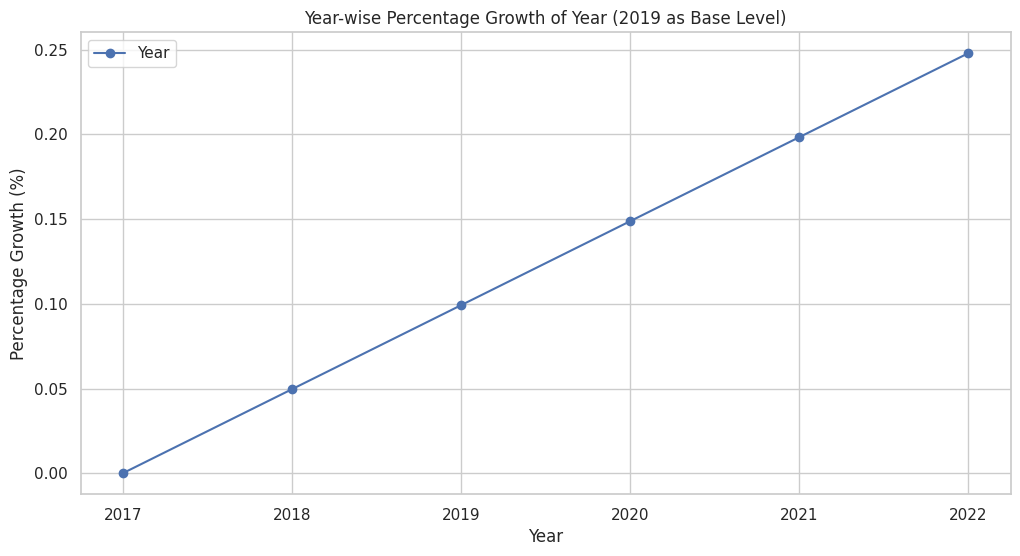

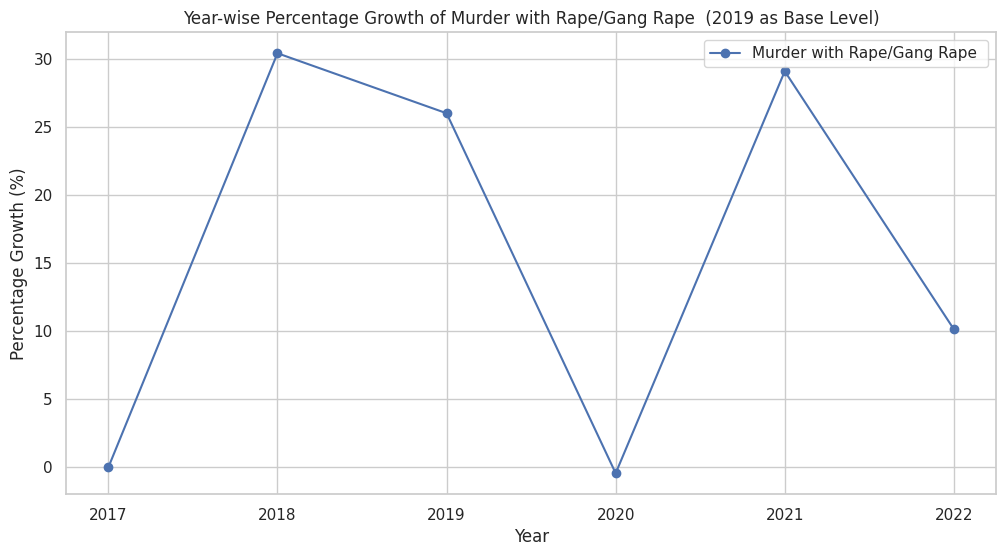

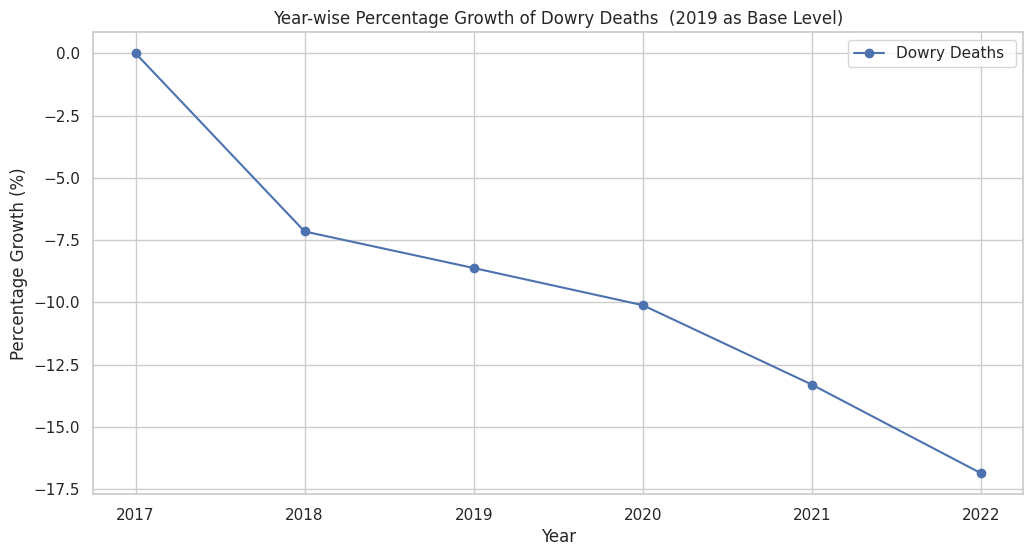

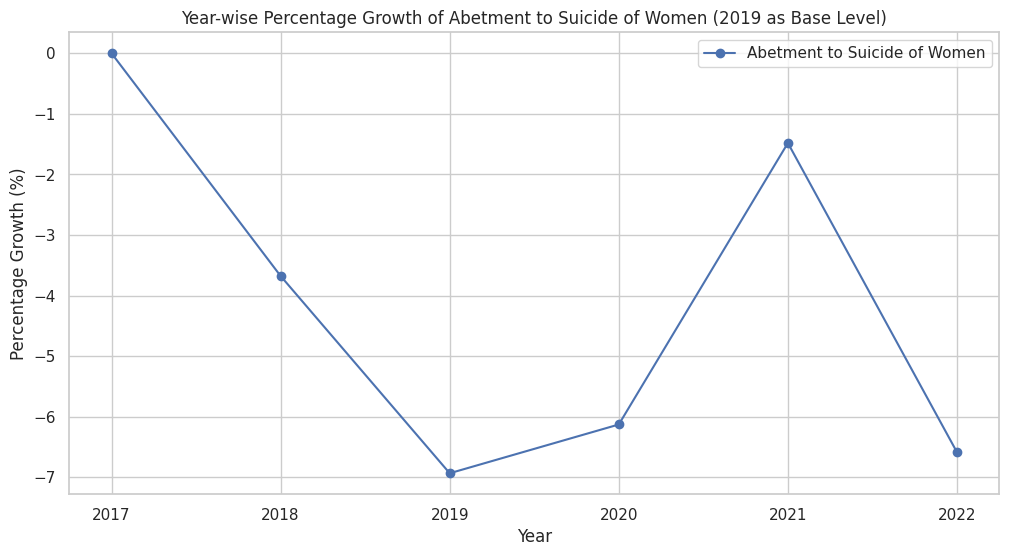

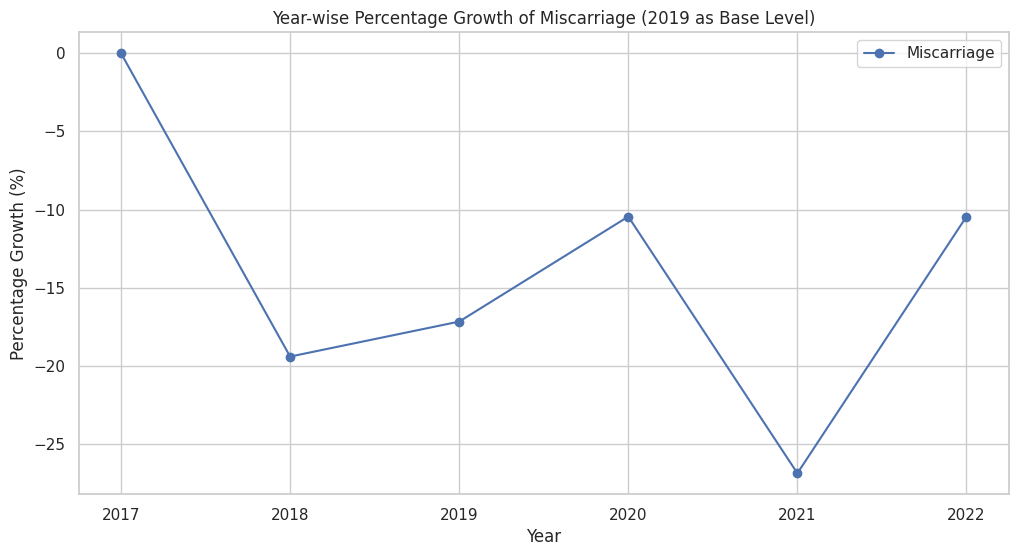

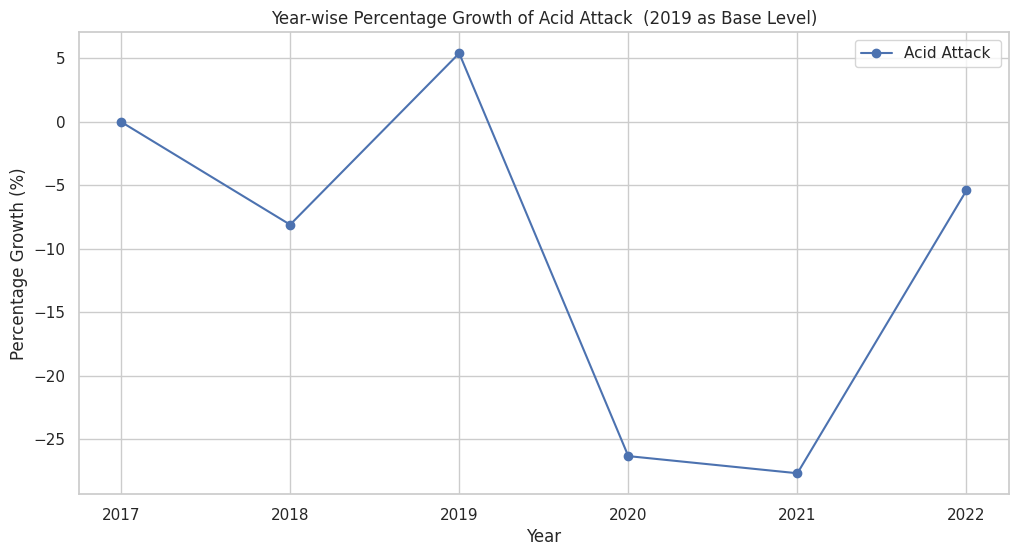

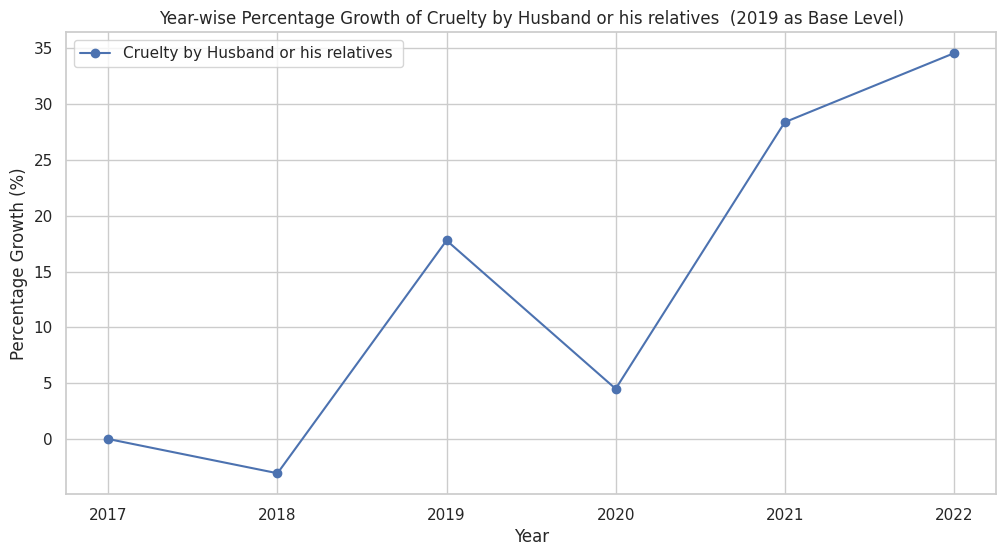

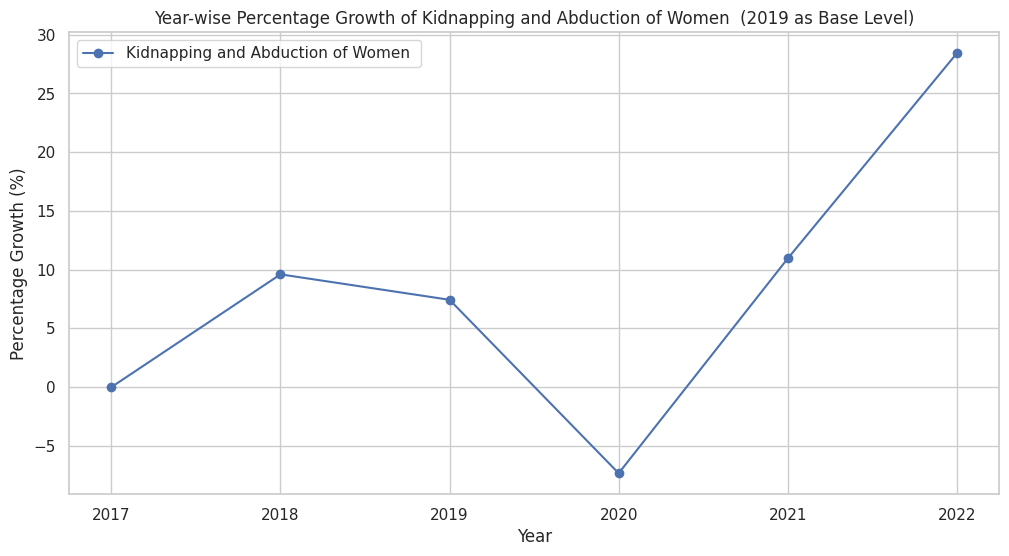

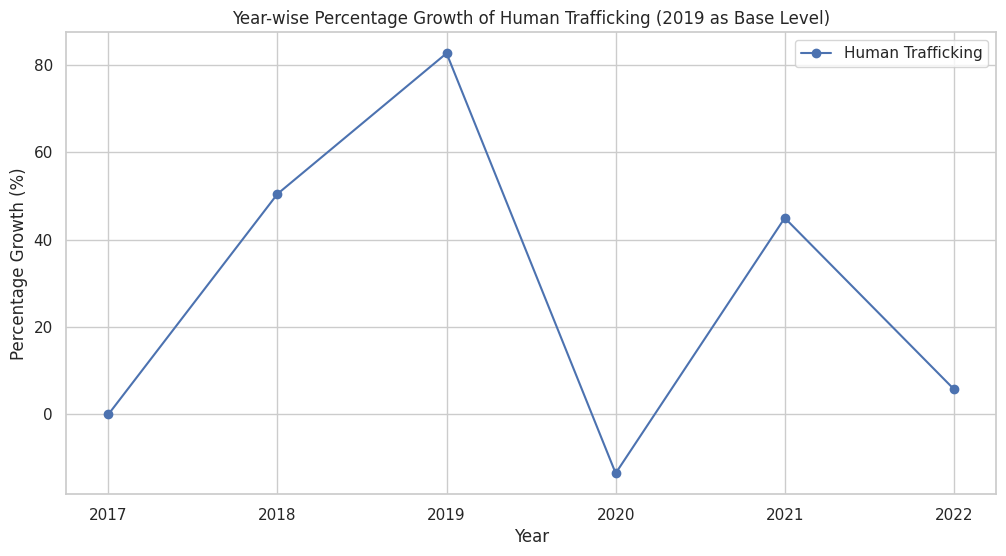

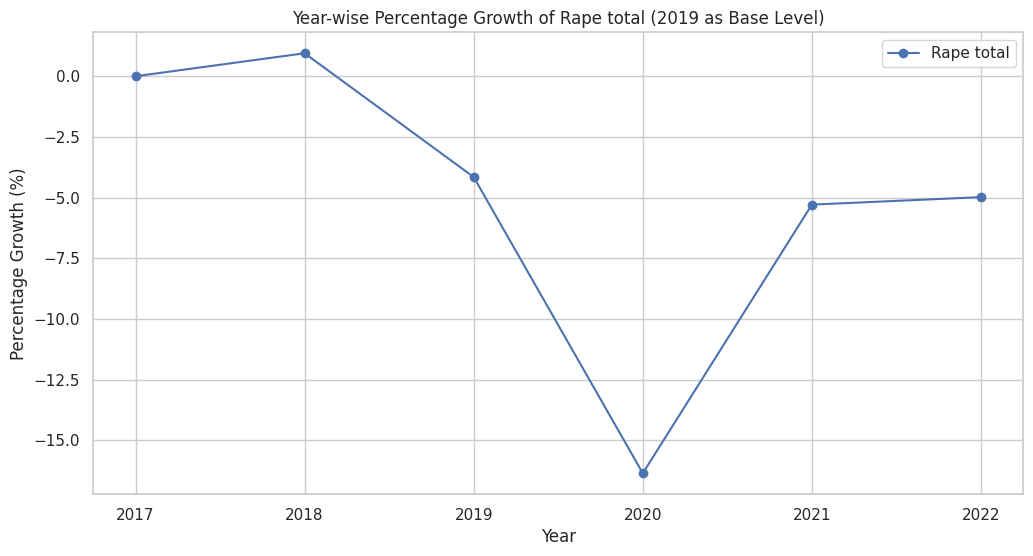

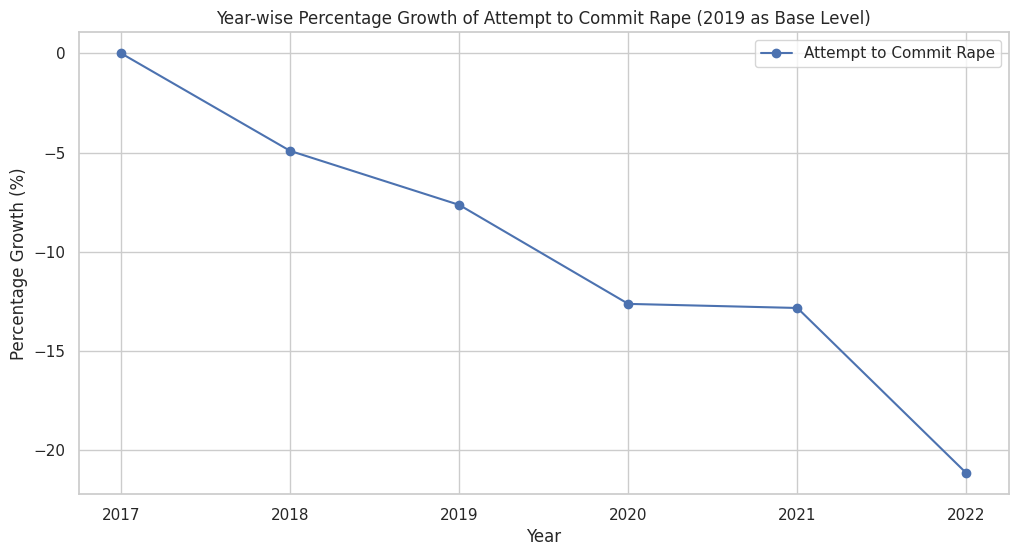

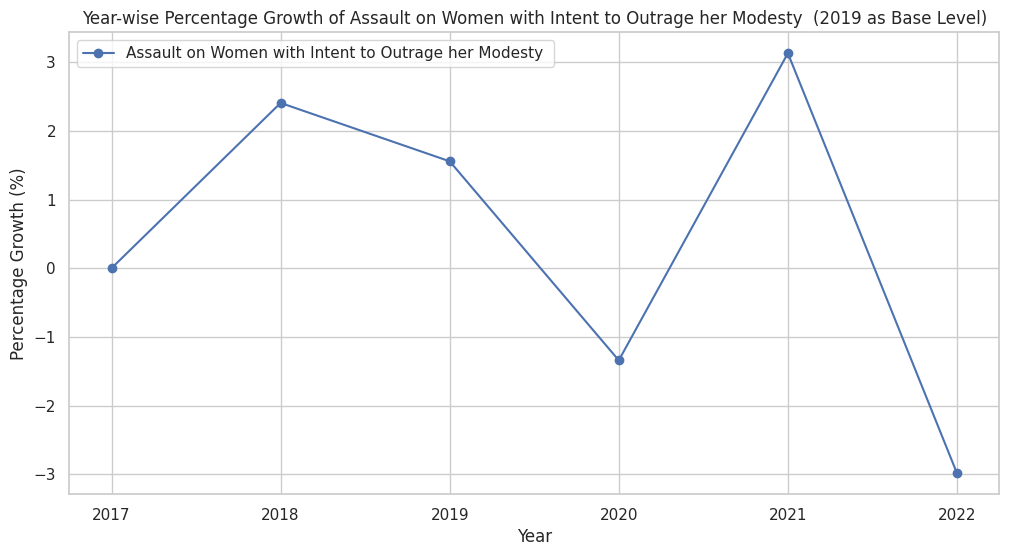

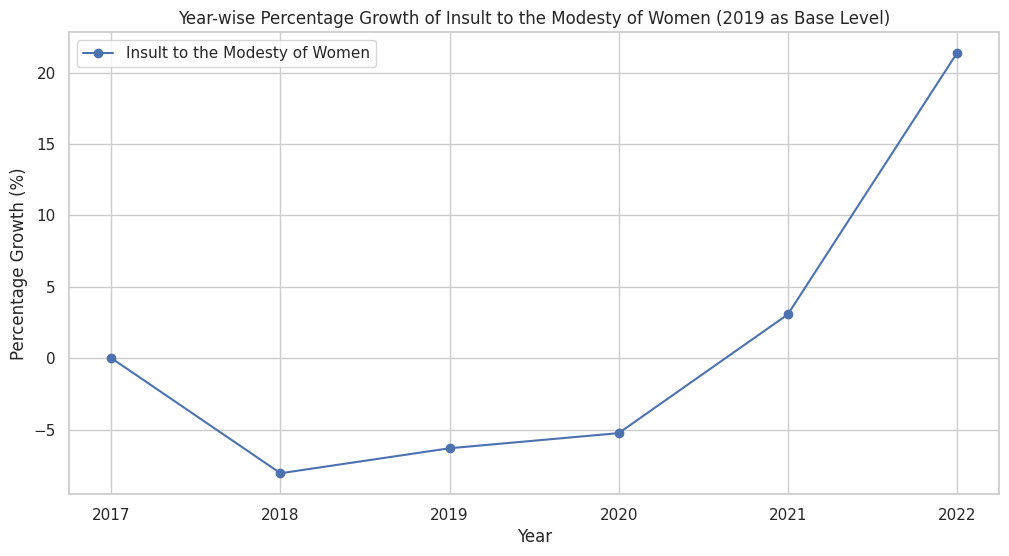

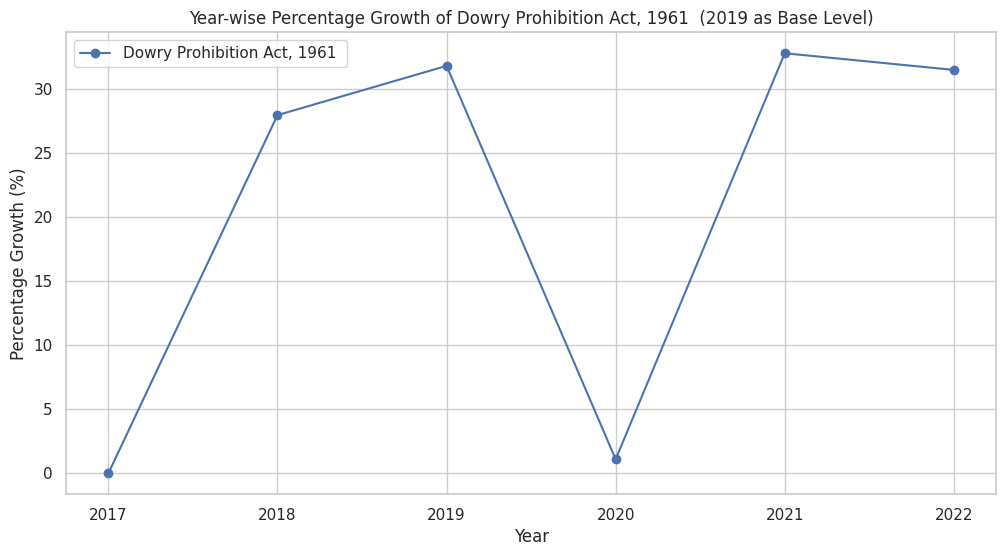

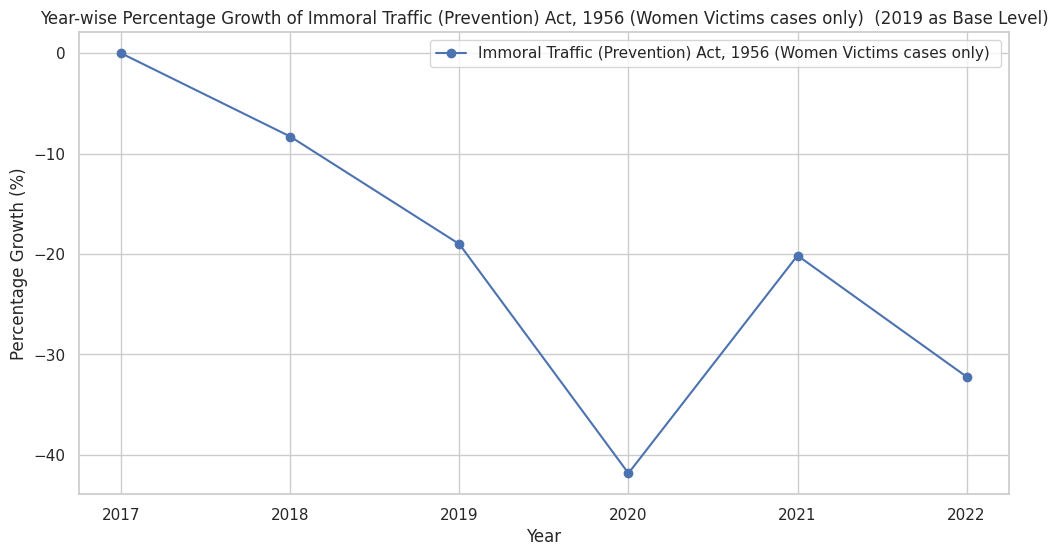

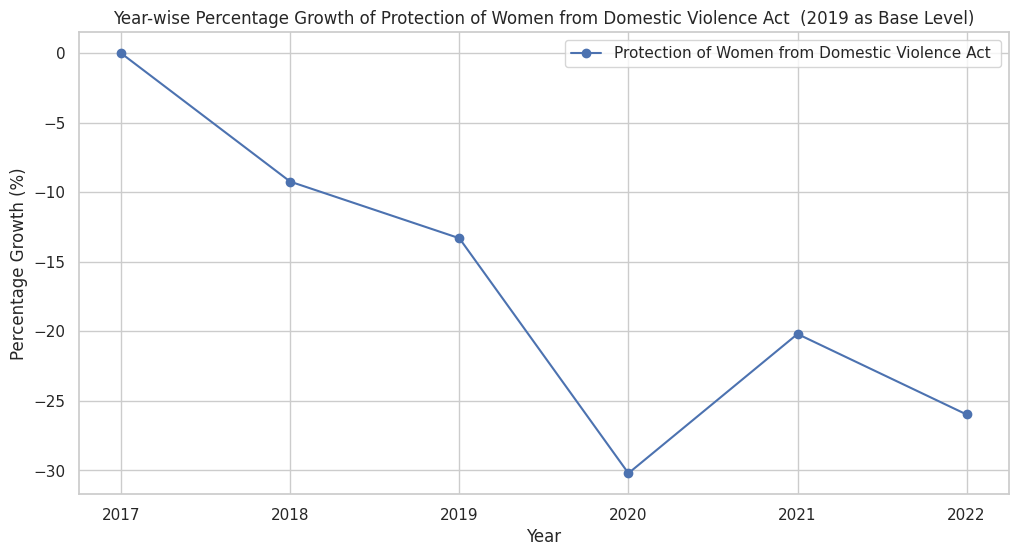

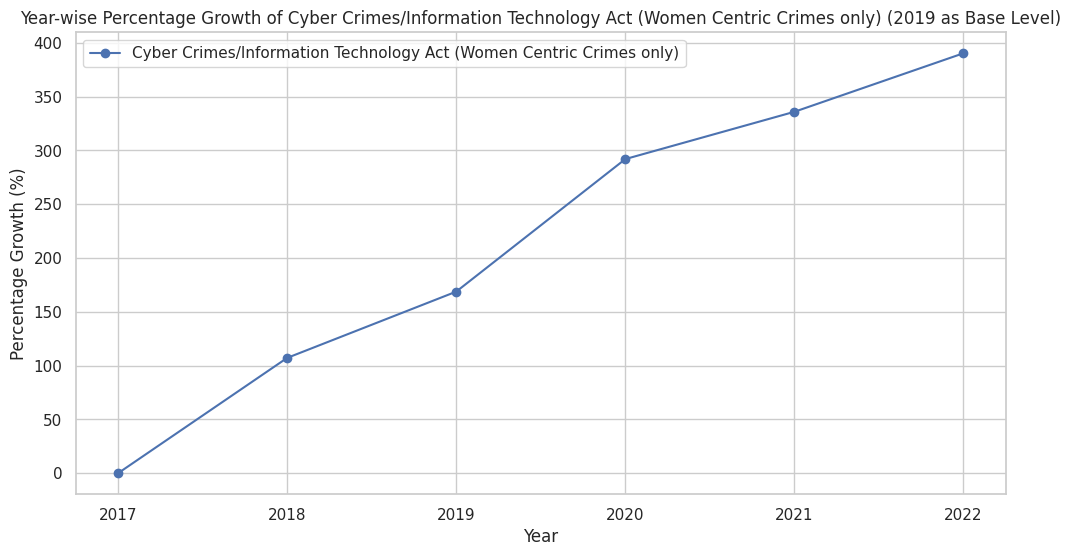

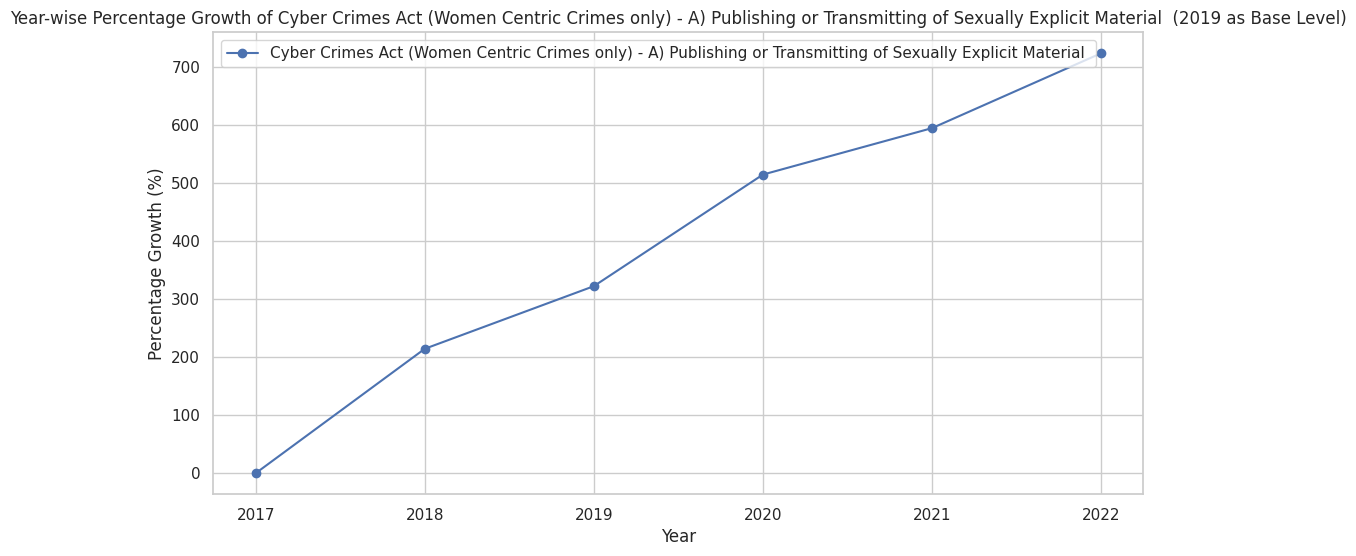

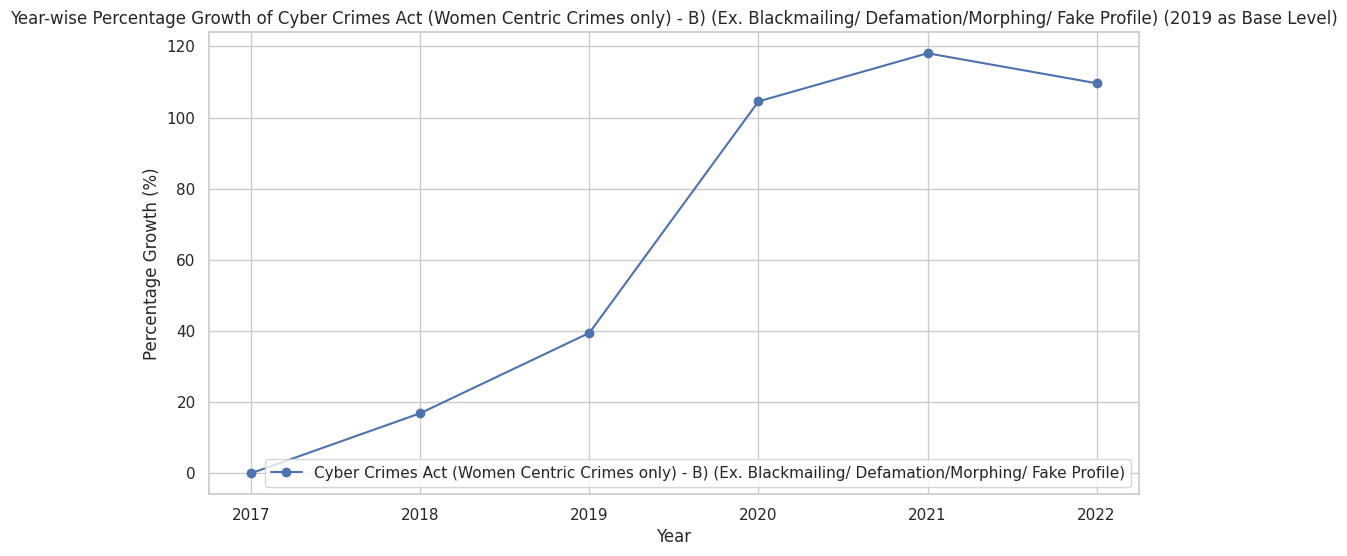

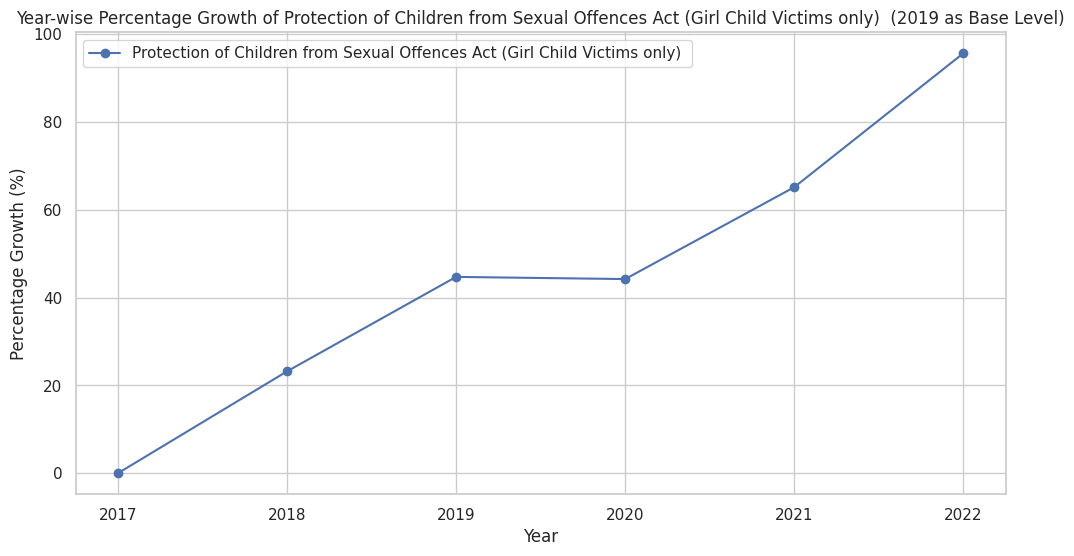

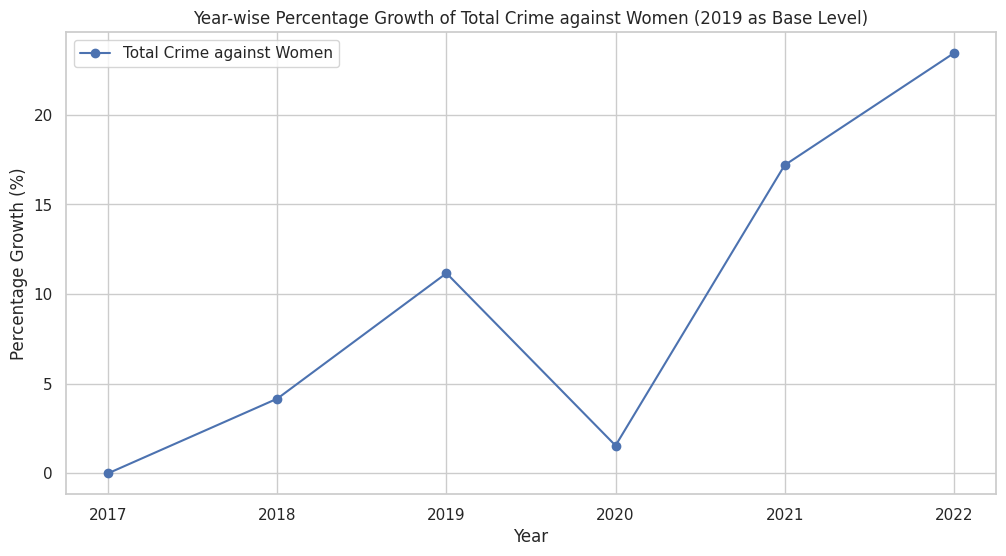

In [ ]:
# Ensure the 'Year' column is in the correct data type
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter the data for the years 2019-2022
filtered_df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Drop the columns 'Sl. No.', 'Category', and 'State/UT'
filtered_df = filtered_df.drop(columns=['Sl. No.', 'Category', 'State/UT'])

# Ensure that we sum only numeric columns
numeric_cols = filtered_df.select_dtypes(include=['number']).columns
yearly_analysis = filtered_df.groupby('Year')[numeric_cols].sum()

# Normalize data so that 2019 values are at 0% level
yearly_analysis_normalized = yearly_analysis.copy()
for column in numeric_cols:
    base_value = yearly_analysis.loc[2017, column] if 2017 in yearly_analysis.index else 0
    yearly_analysis_normalized[column] = ((yearly_analysis[column] - base_value) / base_value) * 100

# Plotting each crime category
for column in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_analysis_normalized.index, yearly_analysis_normalized[column], marker='o', linestyle='-', label=column)
    plt.title(f'Year-wise Percentage Growth of {column} (2019 as Base Level)')
    plt.xlabel('Year')
    plt.ylabel('Percentage Growth (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(yearly_analysis_normalized.index)  # Set x-ticks to be the year

    # Display the plot
    plt.show()


<ipython-input-9-11bafab9309b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total Crime against Women', data=total_crimes_per_year, palette='viridis')


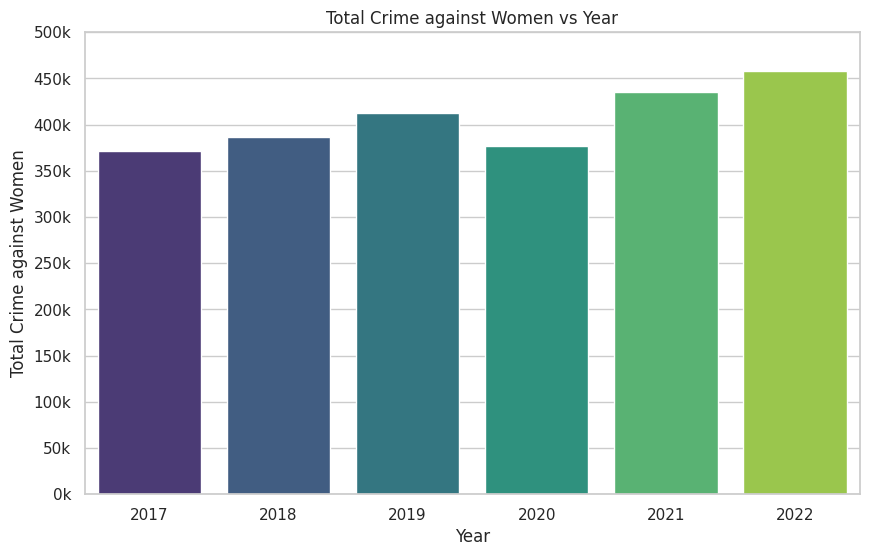

In [ ]:
import seaborn as sns
total_crimes_per_year = df.groupby('Year')['Total Crime against Women'].sum().reset_index()

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Crime against Women', data=total_crimes_per_year, palette='viridis')

plt.xlabel('Year')
plt.ylabel('Total Crime against Women')
plt.title('Total Crime against Women vs Year')

# Set y-axis labels with more detail and appropriate scale
max_y_value = total_crimes_per_year['Total Crime against Women'].max()
step = 50000  # Adjust the step size as needed
plt.yticks(ticks=range(0, int(max_y_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_y_value) + step, step)])



plt.show()

<ipython-input-10-64455a33e6ad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')


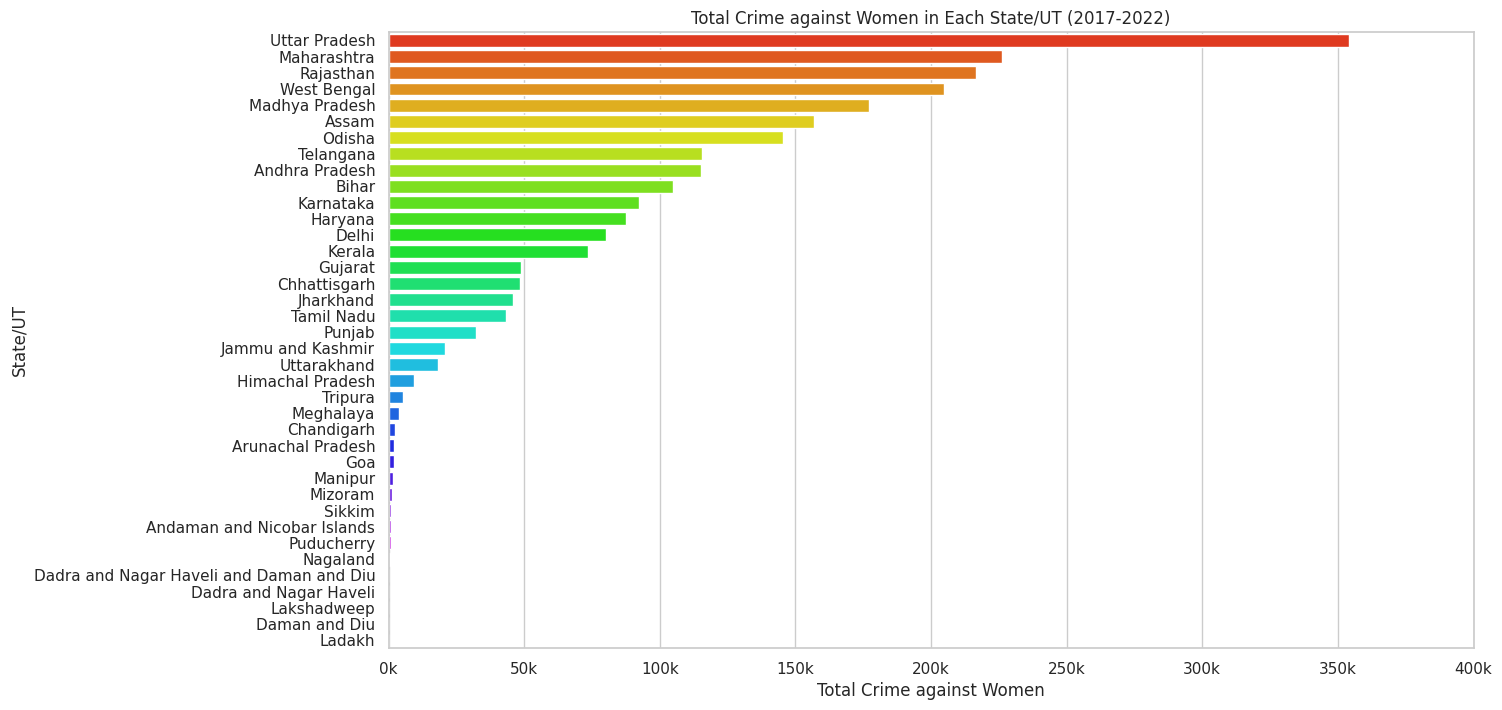

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')
df_filtered = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Total Crime against Women in Each State/UT (2017-2022)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = total_crimes_per_state['Total Crime against Women'].max()
step = 50000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()

<ipython-input-11-a94b6d617003>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')


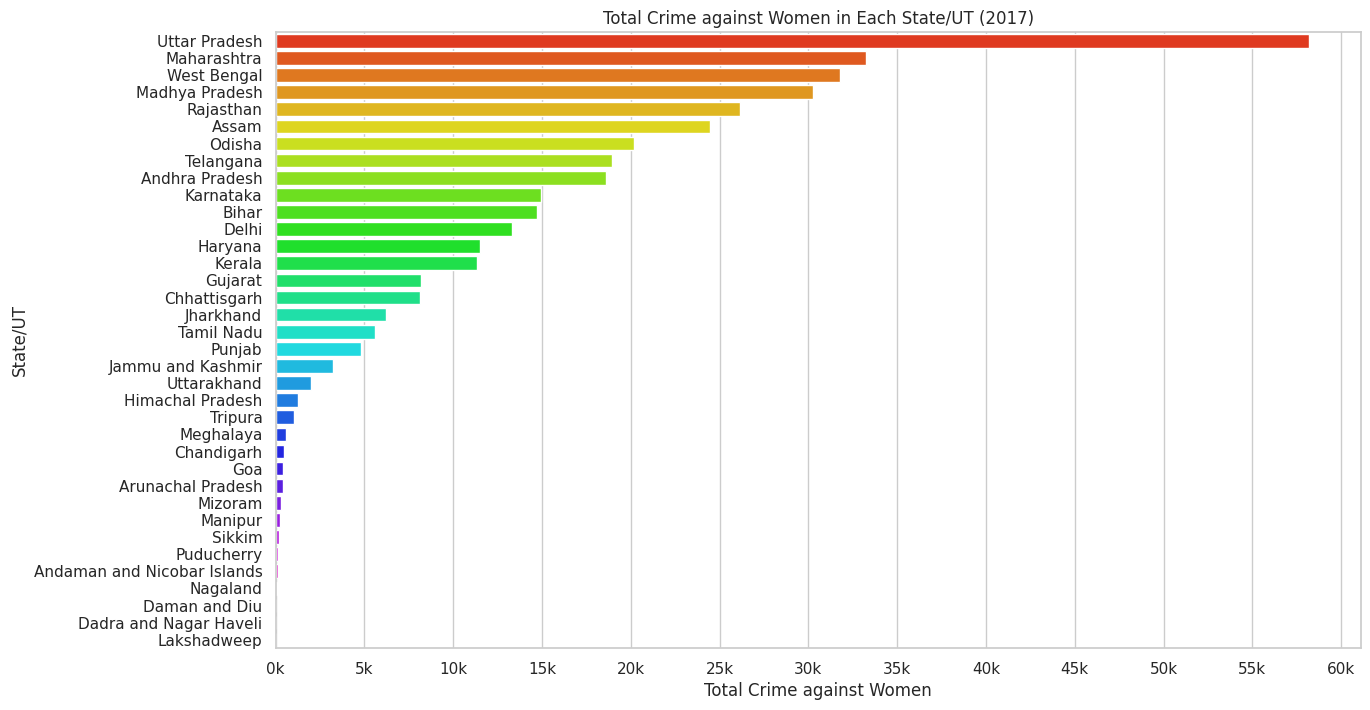

In [ ]:
df_filtered = df[df['Year'].isin([2017])]

# Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Total Crime against Women in Each State/UT (2017)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = total_crimes_per_state['Total Crime against Women'].max()
step = 5000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()

<ipython-input-12-a137f4dfde39>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')


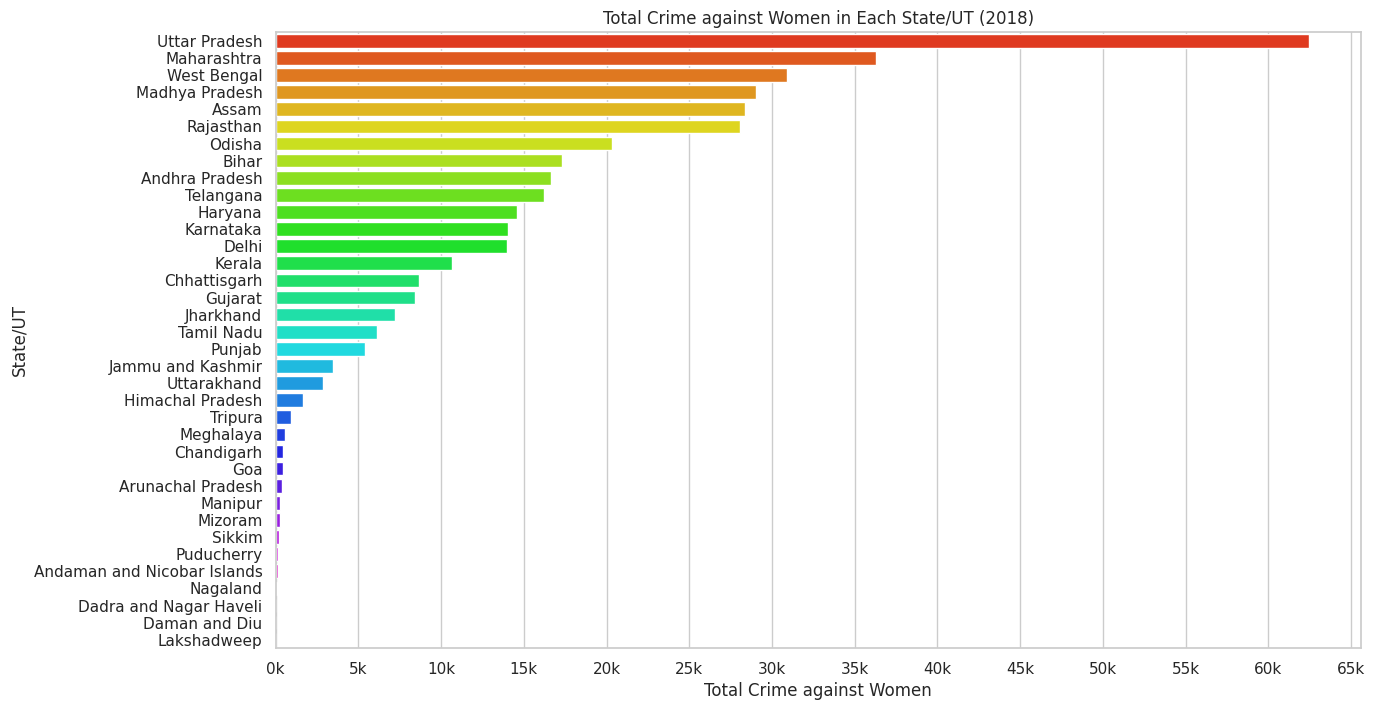

In [ ]:
df_filtered = df[df['Year'].isin([2018])]

# Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Total Crime against Women in Each State/UT (2018)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = total_crimes_per_state['Total Crime against Women'].max()
step = 5000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()

<ipython-input-13-1ab7b84be7d5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')


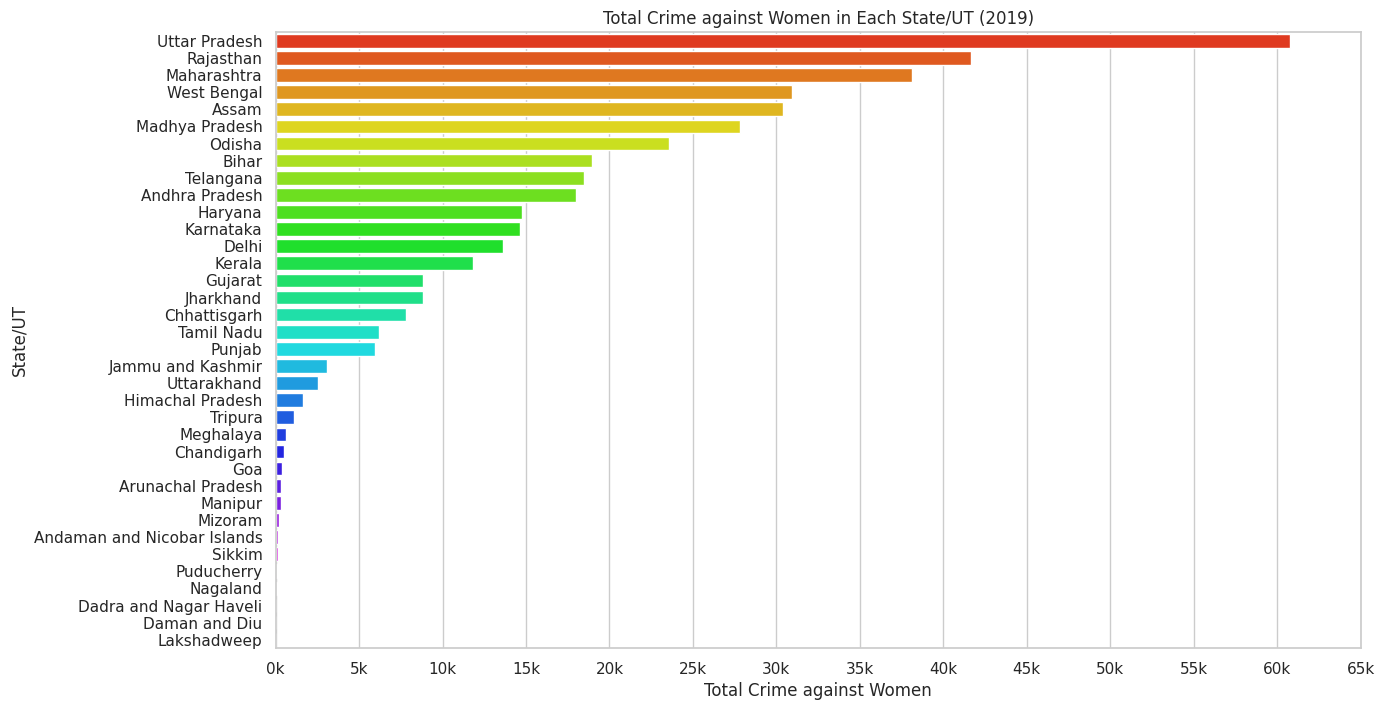

In [ ]:
df_filtered = df[df['Year'].isin([2019])]

# Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Total Crime against Women in Each State/UT (2019)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = total_crimes_per_state['Total Crime against Women'].max()
step = 5000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()

<ipython-input-14-7cb5ba5fffde>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')


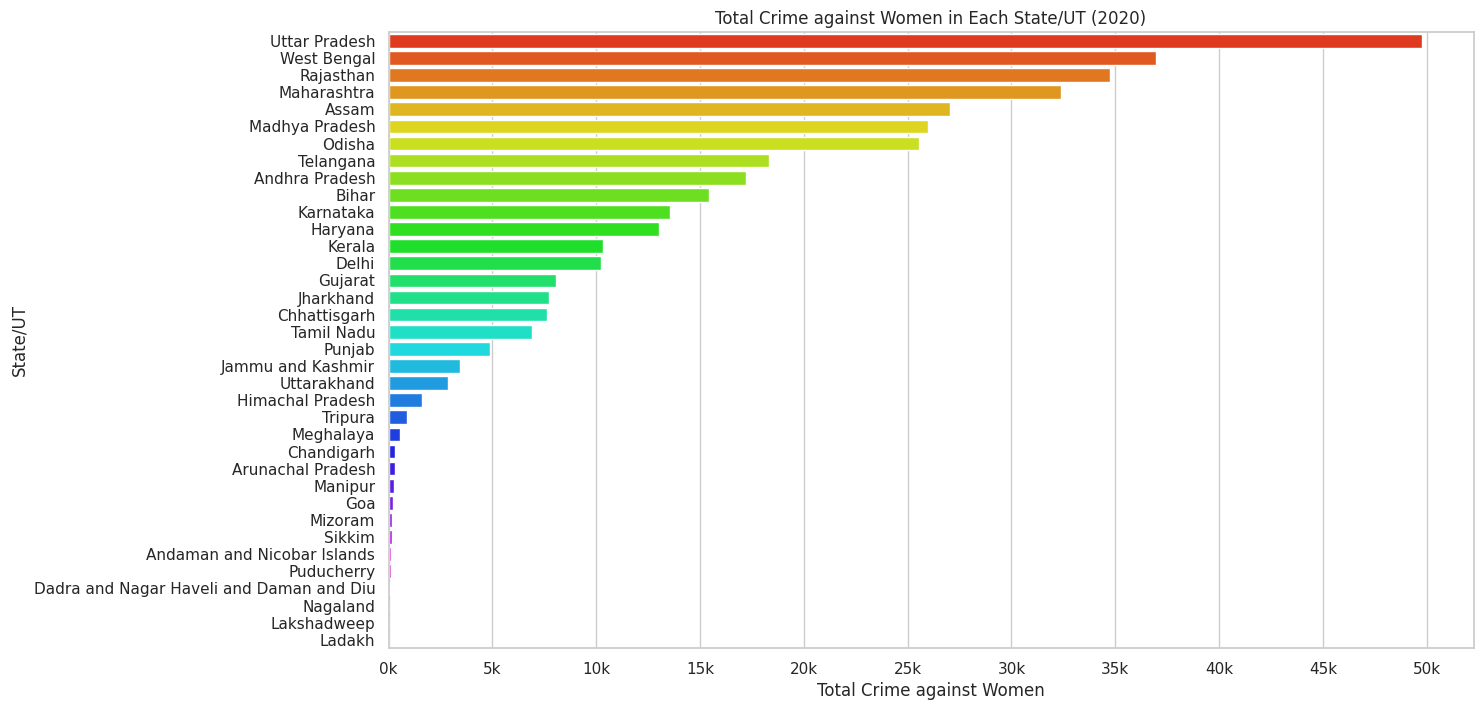

In [ ]:
df_filtered = df[df['Year'].isin([2020])]

# Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Total Crime against Women in Each State/UT (2020)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = total_crimes_per_state['Total Crime against Women'].max()
step = 5000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()

<ipython-input-15-9019a4056163>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')


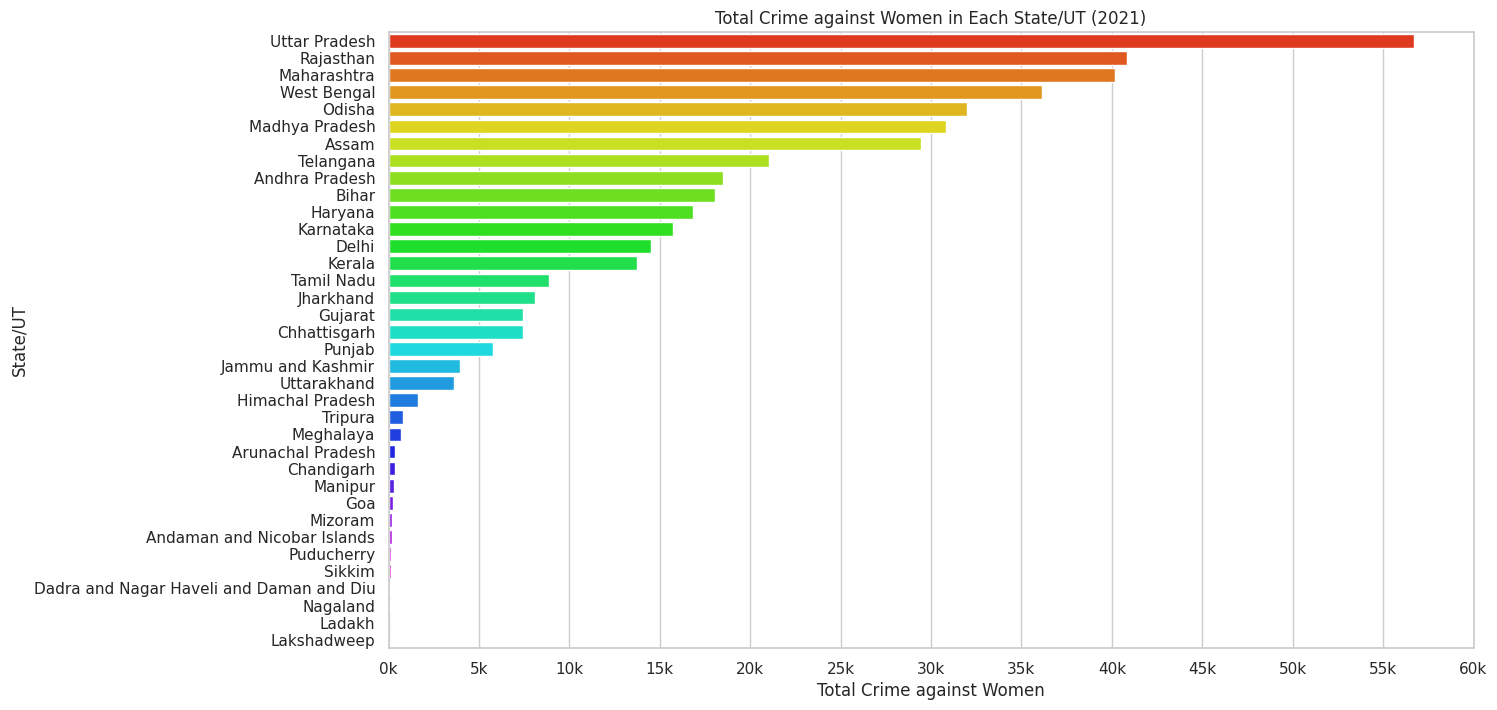

In [ ]:
df_filtered = df[df['Year'].isin([2021])]

# Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Total Crime against Women in Each State/UT (2021)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = total_crimes_per_state['Total Crime against Women'].max()
step = 5000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()

<ipython-input-16-d93b28831fb3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')


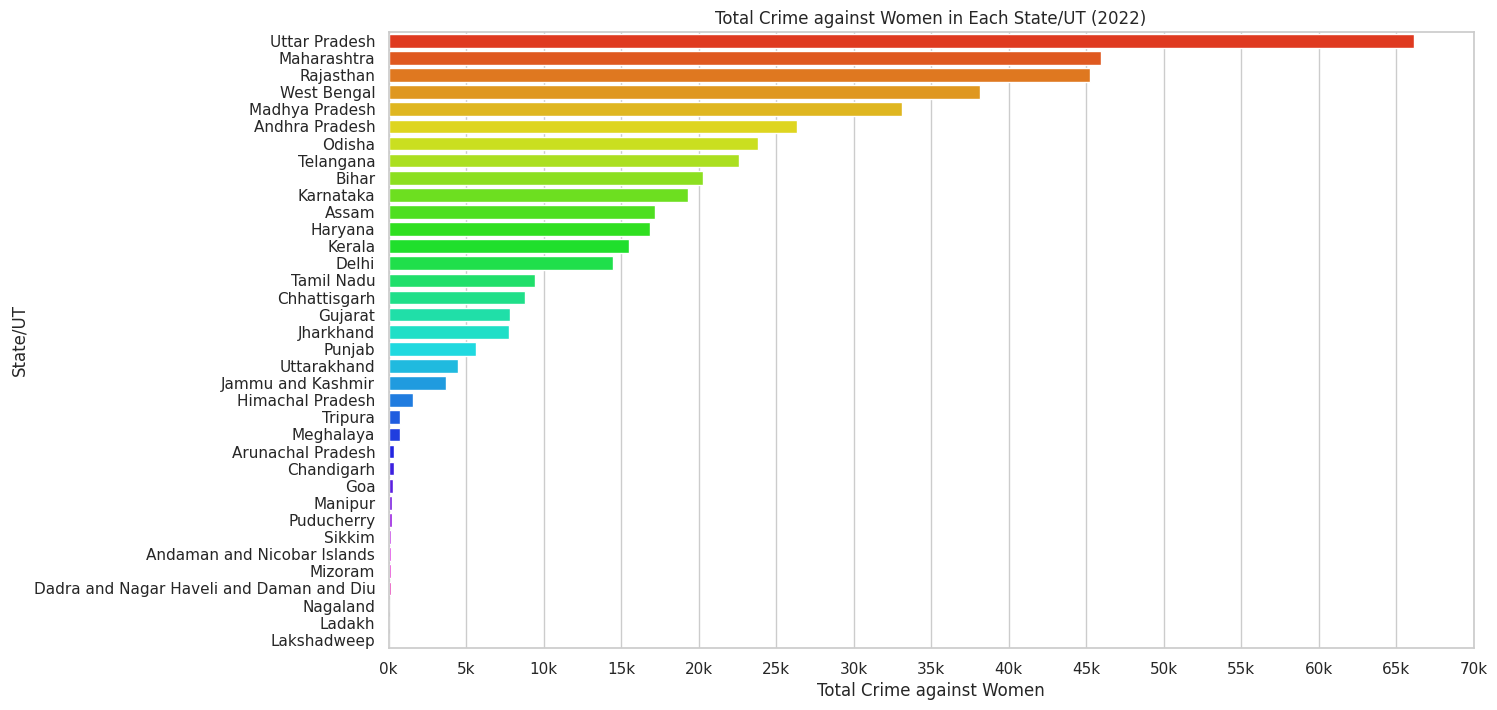

In [ ]:
df_filtered = df[df['Year'].isin([2022])]

# Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Plotting the histogram
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=total_crimes_per_state, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Total Crime against Women in Each State/UT (2022)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = total_crimes_per_state['Total Crime against Women'].max()
step = 5000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()

<ipython-input-17-5dea0536dea7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Crime against Women', y='State/UT', data=top_7_states, palette='hsv')


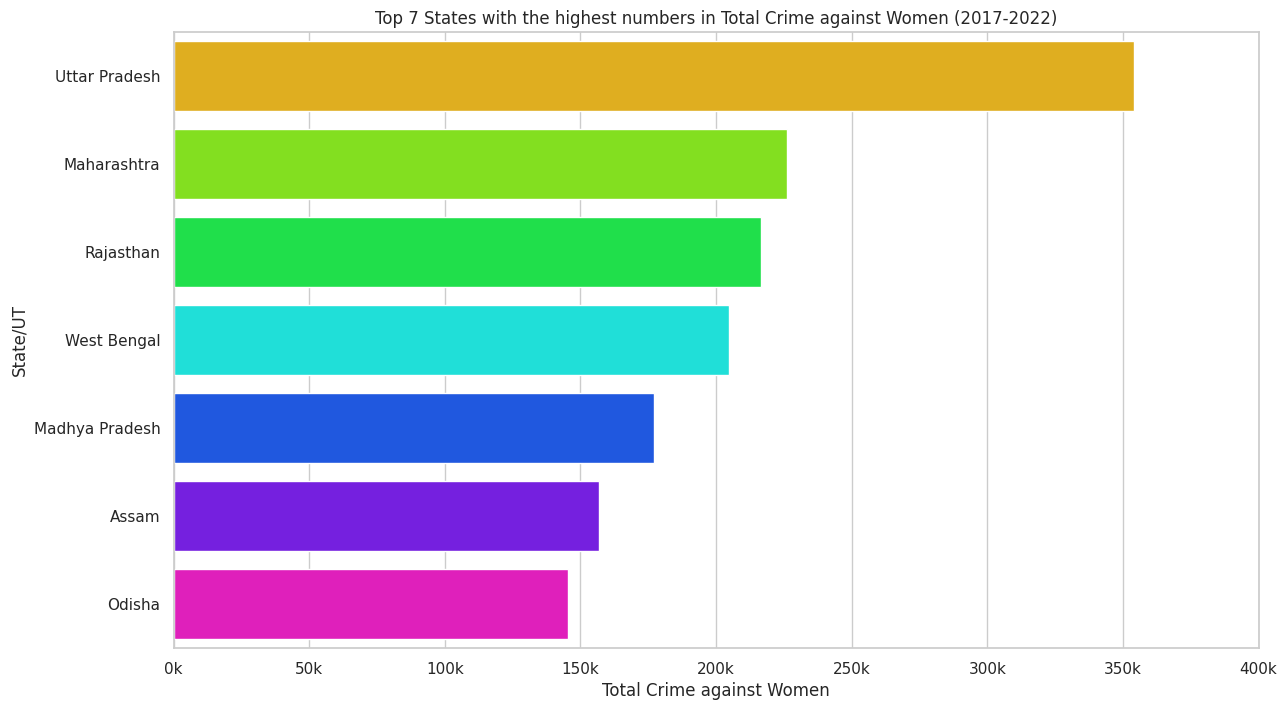

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe
df_filtered = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Group by 'State/UT' and sum the 'Total Crime against Women' column
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sort by total crimes for better visualization
total_crimes_per_state = total_crimes_per_state.sort_values(by='Total Crime against Women', ascending=False)

# Select the top 7 states
top_7_states = total_crimes_per_state.head(7)

# Plotting the bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Crime against Women', y='State/UT', data=top_7_states, palette='hsv')

plt.xlabel('Total Crime against Women')
plt.ylabel('State/UT')
plt.title('Top 7 States with the highest numbers in Total Crime against Women (2017-2022)')

# Set x-axis labels with more detail and appropriate scale
max_x_value = top_7_states['Total Crime against Women'].max()
step = 50000  # Adjust the step size as needed
plt.xticks(ticks=range(0, int(max_x_value) + step, step), labels=[f'{x//1000}k' for x in range(0, int(max_x_value) + step, step)])

plt.show()


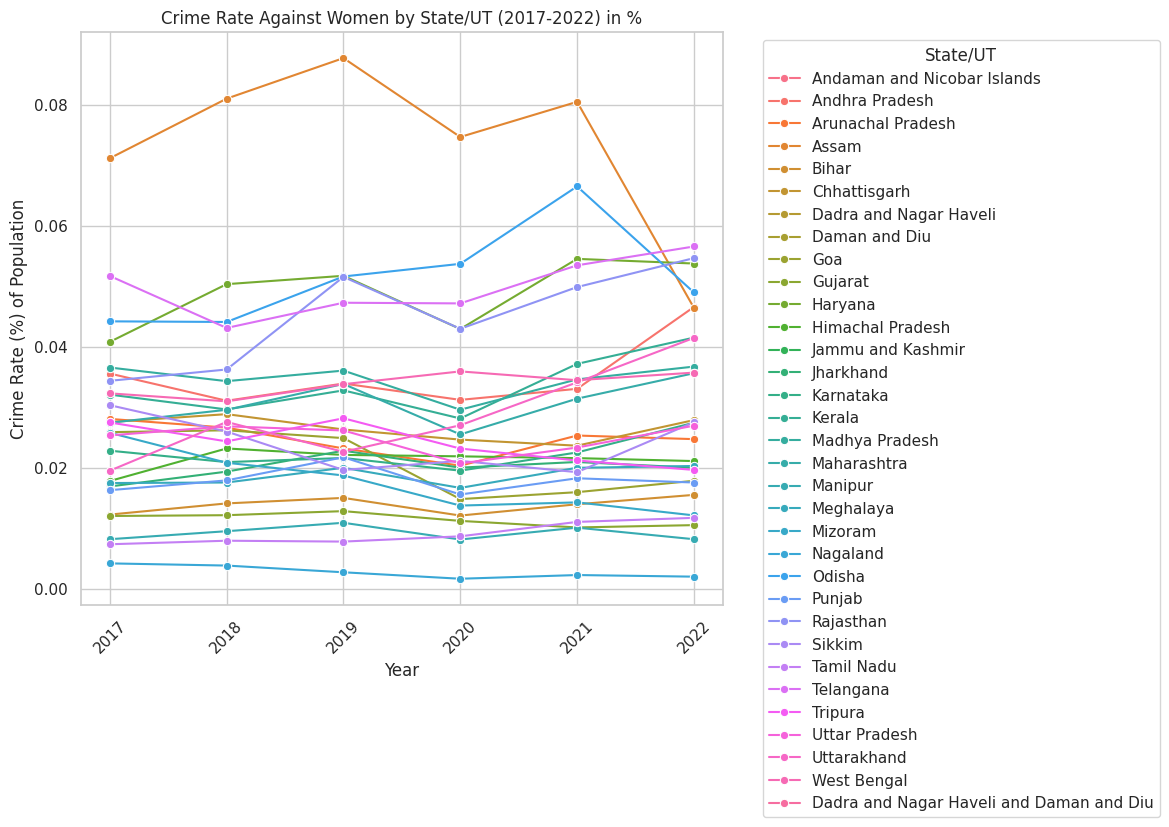

In [ ]:
population_df = pd.read_csv("/content/drive/MyDrive/Dataset_ML24/Population.csv")

# Convert population columns to numeric, handling any commas or non-numeric characters
for year in [2017, 2018, 2019, 2020, 2021, 2022]:
    population_df[str(year)] = population_df[str(year)].replace(',', '', regex=True).astype(float)

# Filter the dataset to include only the years 2017-2022
df_filtered = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# List of Union Territories to exclude
ut_list = ['Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Lakshadweep', 'Delhi', 'Puducherry', 'Ladakh', 'Jammu & Kashmir']

# Exclude Union Territories from the dataset
df_filtered = df_filtered[~df_filtered['State/UT'].isin(ut_list)]

# Prepare an empty DataFrame to store the results
results = pd.DataFrame()

# Loop through each year to calculate crime rates
for year in [2017, 2018, 2019, 2020, 2021, 2022]:
    # Filter the crime data for the specific year
    df_year = df_filtered[df_filtered['Year'] == year]

    # Group by 'State/UT' and sum the 'Total Crime against Women (IPC+SLL) - V - Col.(163)' column
    total_crimes_per_state = df_year.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

    # Merge the total crimes with the population data for the specific year
    population_year_df = population_df[['State', str(year)]].rename(columns={str(year): 'Population'})
    merged_df = pd.merge(total_crimes_per_state, population_year_df, left_on='State/UT', right_on='State', how='left')

    # Calculate crime rate as a percentage of the population
    merged_df['Crime Rate (%)'] = (merged_df['Total Crime against Women'] / merged_df['Population']) * 100

    # Add the year to the results DataFrame
    merged_df['Year'] = year
    results = pd.concat([results, merged_df[['State/UT', 'Crime Rate (%)', 'Year']]], ignore_index=True)

# Plot the crime rates as percentages over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=results, x='Year', y='Crime Rate (%)', hue='State/UT', marker='o')
plt.xticks(rotation=45)
plt.title('Crime Rate Against Women by State/UT (2017-2022) in %')
plt.xlabel('Year')
plt.ylabel('Crime Rate (%) of Population')
plt.legend(title='State/UT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-19-9bca9dd60017>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='Crime Rate (%)', y='State/UT', palette='viridis')


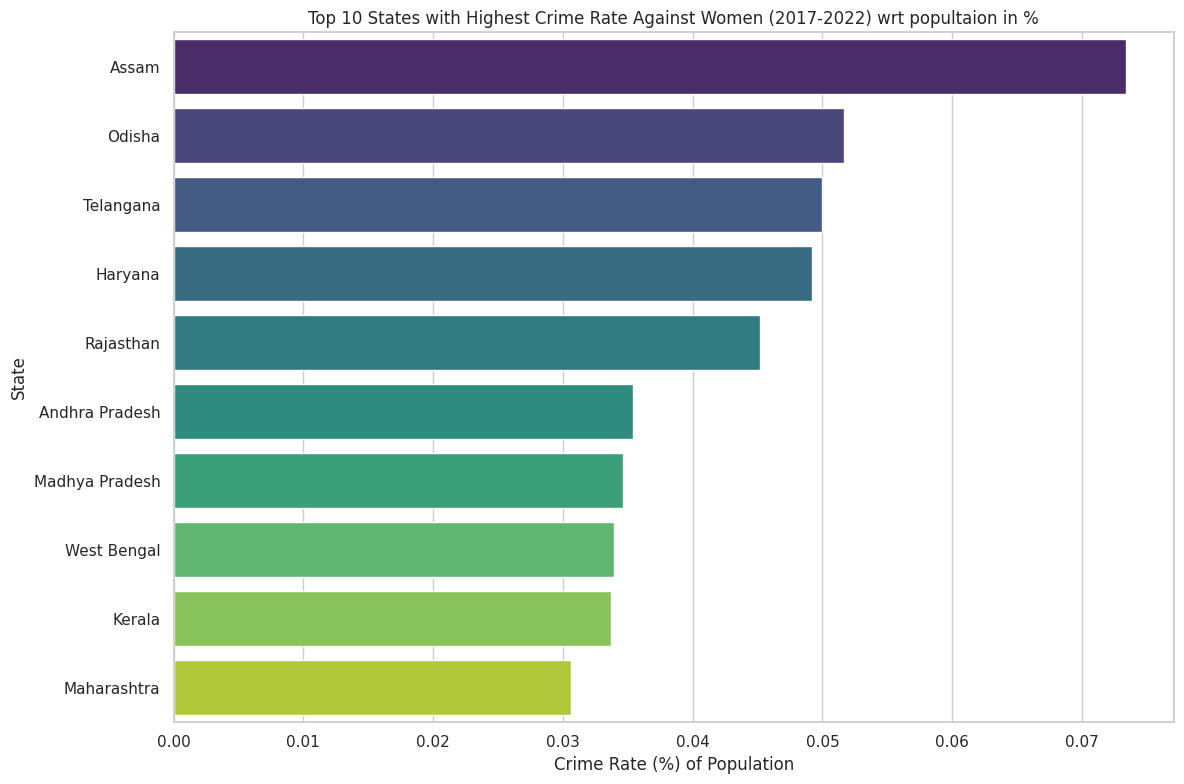

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the population dataset
population_df = pd.read_csv("/content/drive/MyDrive/Dataset_ML24/Population.csv")

# Convert population columns to numeric, handling any commas or non-numeric characters
for year in [2017, 2018, 2019, 2020, 2021, 2022]:
    population_df[str(year)] = population_df[str(year)].replace(',', '', regex=True).astype(float)

# Ensure the data only includes states present in the population dataset
df_filtered = df[df['State/UT'].isin(population_df['State'])]

# Filter the dataset to include only the years 2017-2022
df_filtered = df_filtered[df_filtered['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Sum the total crimes across all years for each state
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sum the population across all years for each state
population_df['Total Population'] = population_df[[str(year) for year in [2017, 2018, 2019, 2020, 2021, 2022]]].sum(axis=1)

# Merge the total crimes with the summed population data
merged_df = pd.merge(total_crimes_per_state, population_df[['State', 'Total Population']], left_on='State/UT', right_on='State', how='left')

# Calculate crime rate as a percentage of the population
merged_df['Crime Rate (%)'] = (merged_df['Total Crime against Women'] / merged_df['Total Population']) * 100

# Sort the data by crime rate
merged_df = merged_df.sort_values('Crime Rate (%)', ascending=False)

# Select the top 10 states with the highest crime rates
top_10_states = merged_df.head(10)

# Plot the crime rates as percentages for the top 10 states
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_states, x='Crime Rate (%)', y='State/UT', palette='viridis')
plt.title('Top 10 States with Highest Crime Rate Against Women (2017-2022) wrt popultaion in %')
plt.xlabel('Crime Rate (%) of Population')
plt.ylabel('State')
plt.tight_layout()
plt.show()


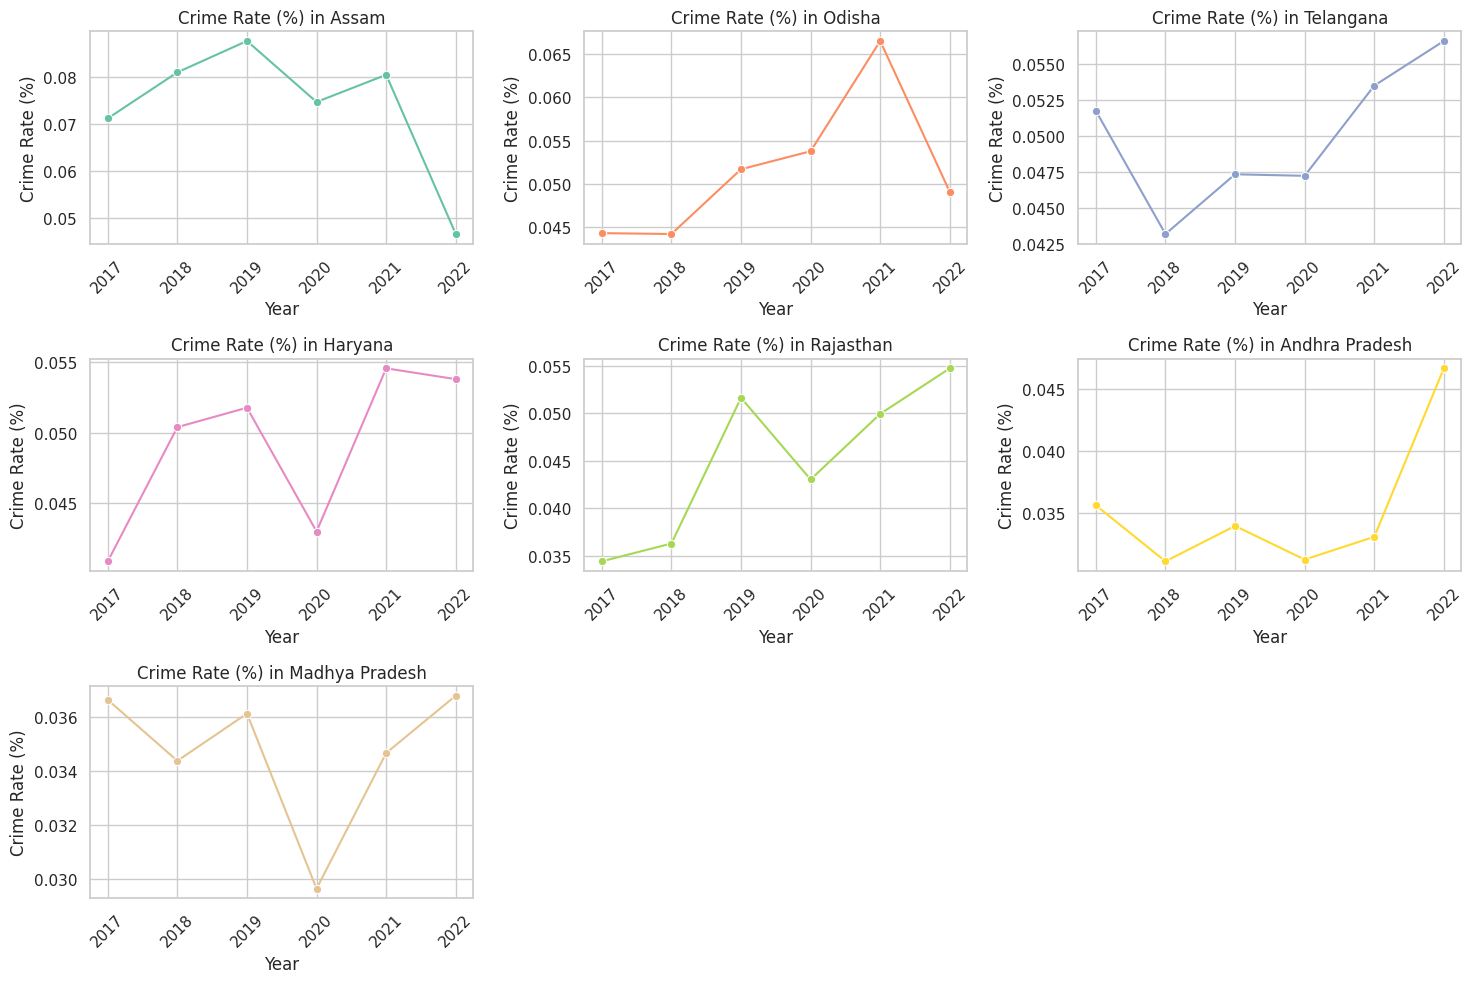

In [ ]:
# Convert population columns to numeric, handling any commas or non-numeric characters
for year in [2017, 2018, 2019, 2020, 2021, 2022]:
    population_df[str(year)] = population_df[str(year)].replace(',', '', regex=True).astype(float)

# Ensure the data only includes states present in the population dataset
df_filtered = df[df['State/UT'].isin(population_df['State'])]

# Filter the dataset to include only the years 2017-2022
df_filtered = df_filtered[df_filtered['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Sum the total crimes across all years for each state
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sum the population across all years for each state
population_df['Total Population'] = population_df[[str(year) for year in [2017, 2018, 2019, 2020, 2021, 2022]]].sum(axis=1)

# Merge the total crimes with the summed population data
merged_df = pd.merge(total_crimes_per_state, population_df[['State', 'Total Population']], left_on='State/UT', right_on='State', how='left')

# Calculate crime rate as a percentage of the population
merged_df['Crime Rate (%)'] = (merged_df['Total Crime against Women'] / merged_df['Total Population']) * 100

# Sort the data by crime rate and get the top 7 states
top_7_states = merged_df.sort_values('Crime Rate (%)', ascending=False).head(7)['State/UT']

# Filter the original dataset for these top 7 states
df_top_7 = df_filtered[df_filtered['State/UT'].isin(top_7_states)]

# Merge the yearly crime data with the population data for each year
yearly_results = pd.DataFrame()

for year in [2017, 2018, 2019, 2020, 2021, 2022]:
    df_year = df_top_7[df_top_7['Year'] == year]
    total_crimes_per_state = df_year.groupby('State/UT')['Total Crime against Women'].sum().reset_index()
    population_year_df = population_df[['State', str(year)]].rename(columns={str(year): 'Population'})
    merged_df = pd.merge(total_crimes_per_state, population_year_df, left_on='State/UT', right_on='State', how='left')
    merged_df['Crime Rate (%)'] = (merged_df['Total Crime against Women'] / merged_df['Population']) * 100
    merged_df['Year'] = year
    yearly_results = pd.concat([yearly_results, merged_df[['State/UT', 'Crime Rate (%)', 'Year']]], ignore_index=True)

# Set the color palette for the plots
palette = sns.color_palette("Set2", 7)  # You can choose other palettes like "Set1", "coolwarm", etc.

# Plot the crime rates year-wise for each of the top 7 states with colorful lines
plt.figure(figsize=(15, 10))

for i, (state, color) in enumerate(zip(top_7_states, palette)):
    plt.subplot(3, 3, i+1)
    sns.lineplot(data=yearly_results[yearly_results['State/UT'] == state], x='Year', y='Crime Rate (%)', marker='o', color=color)
    plt.title(f'Crime Rate (%) in {state}')
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Crime Rate (%)')
    plt.grid(True)  # Add grid lines for better readability

plt.tight_layout()
plt.show()

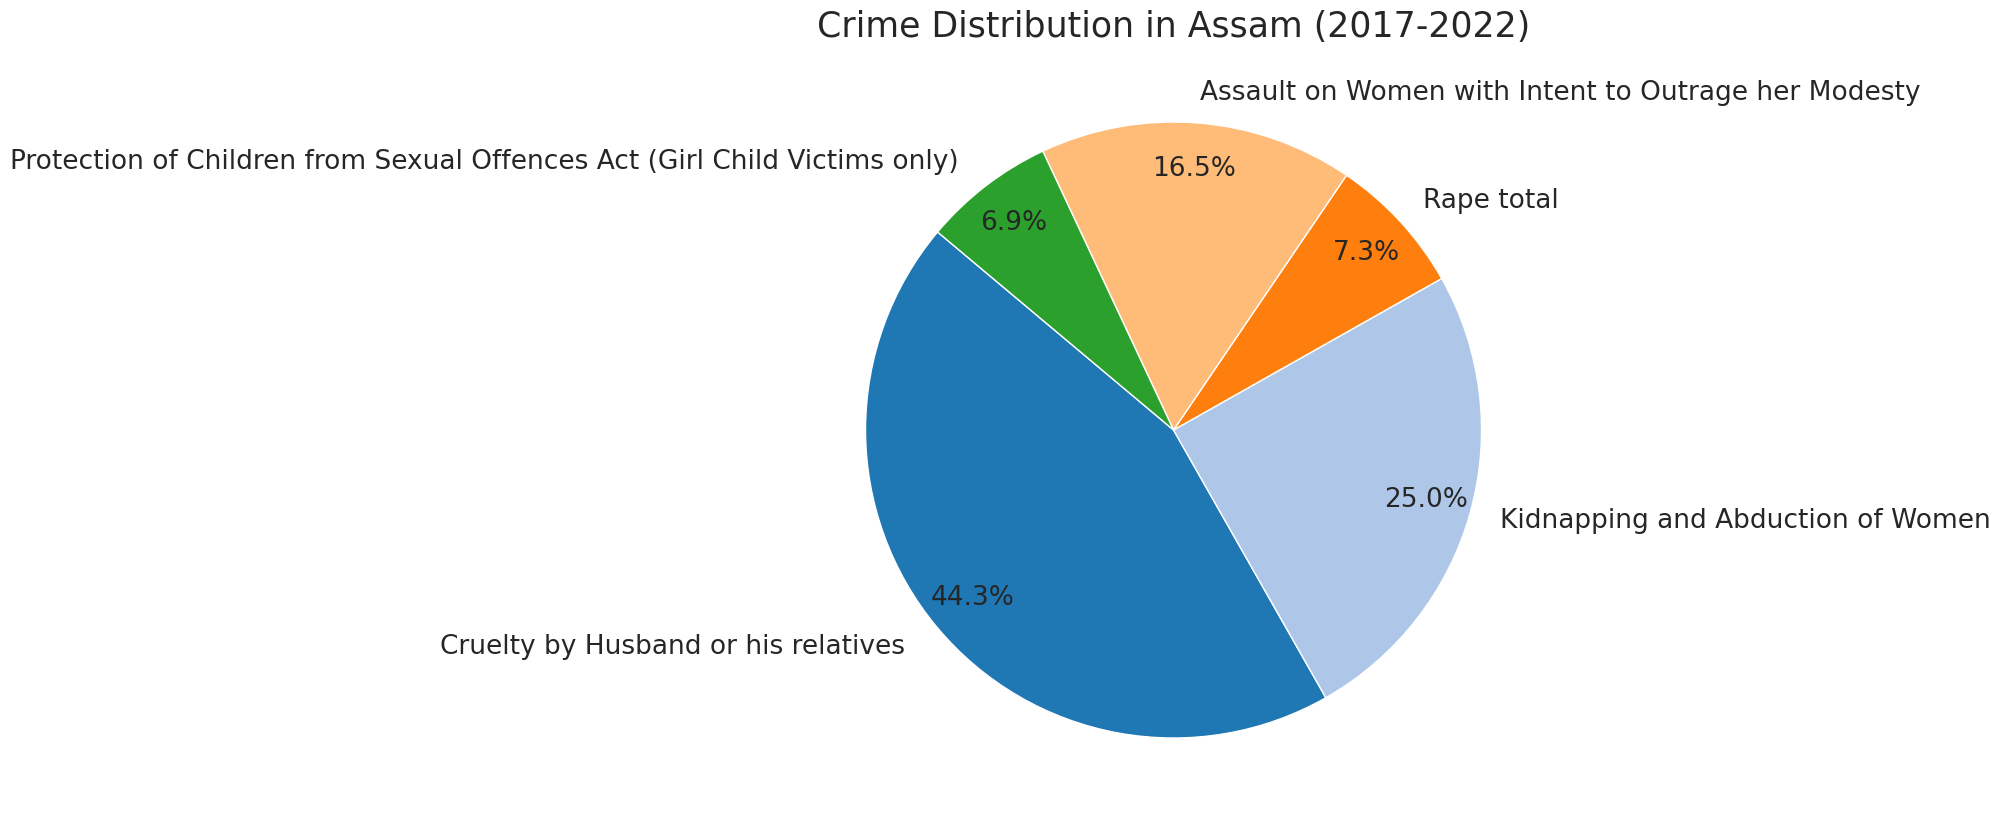

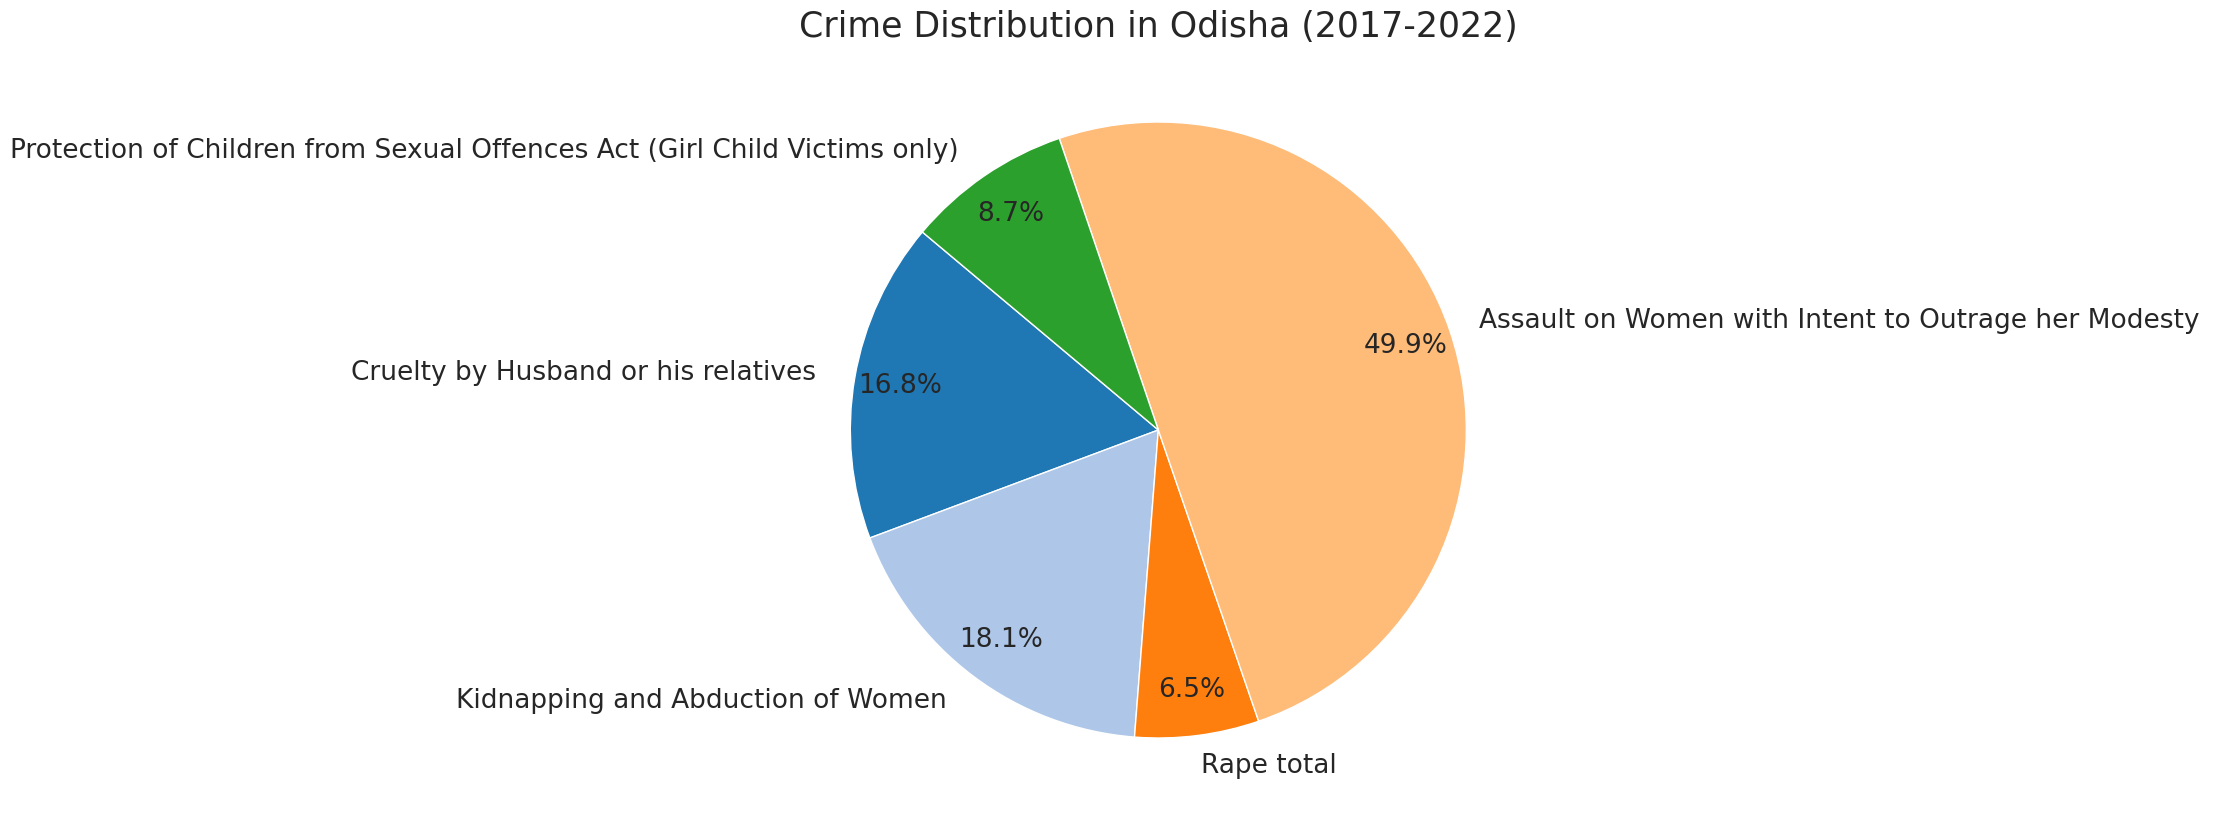

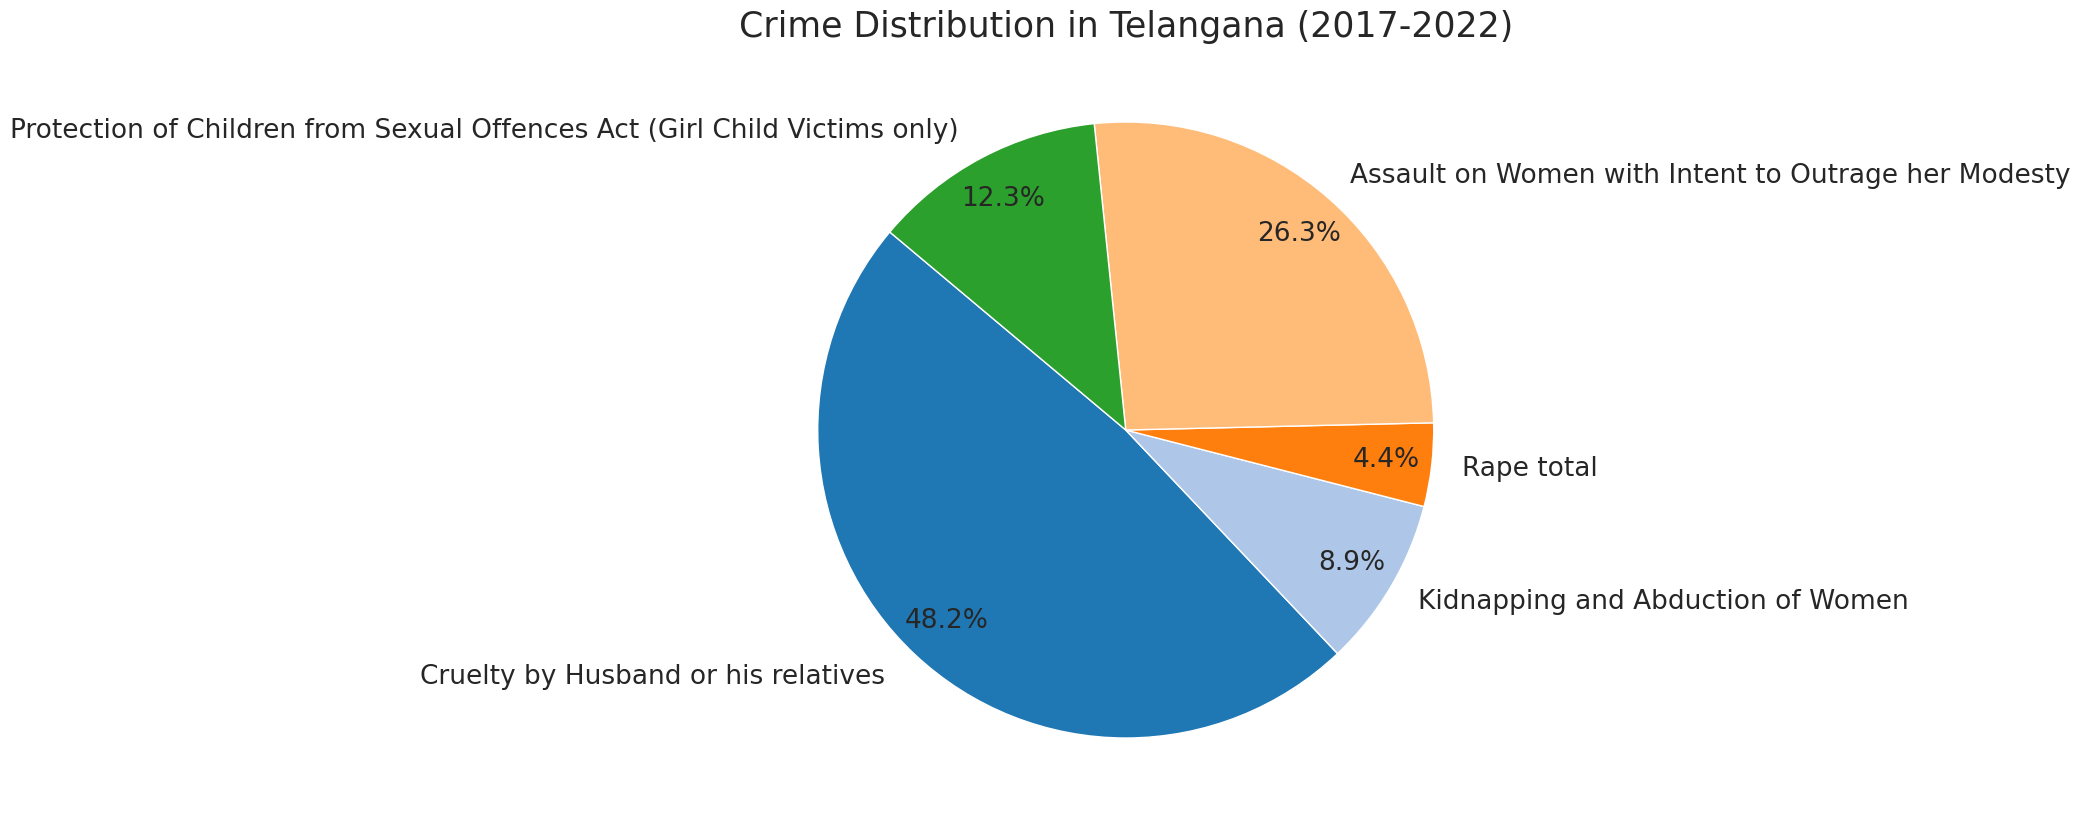

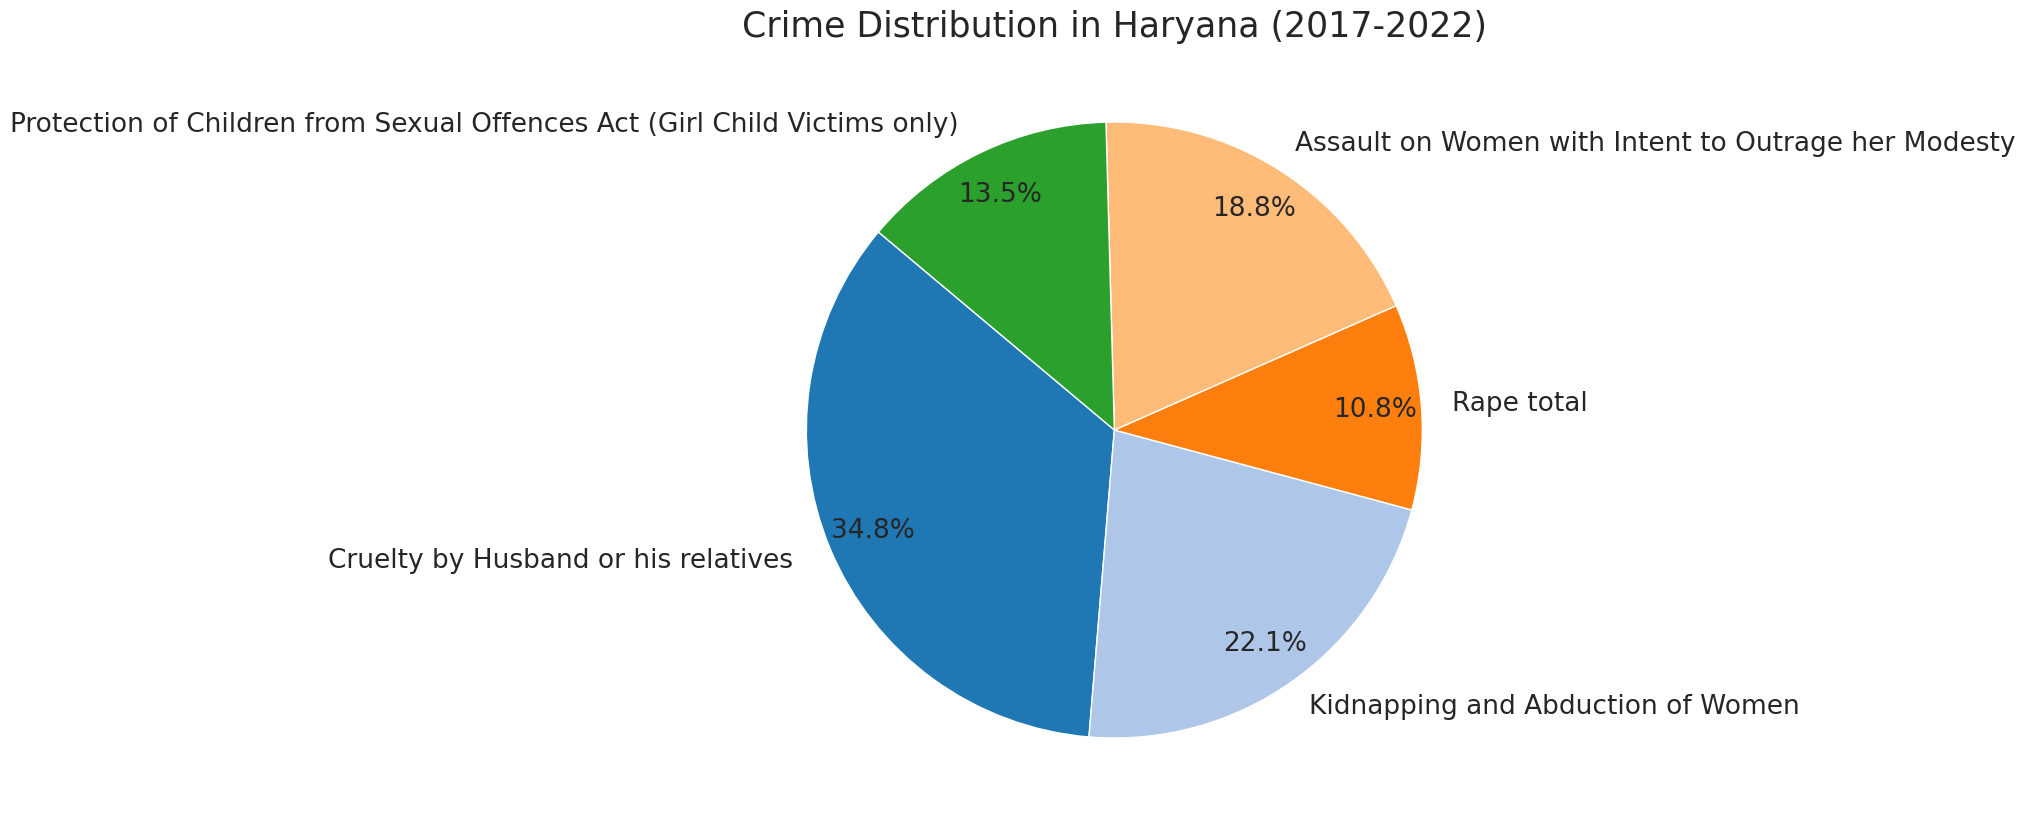

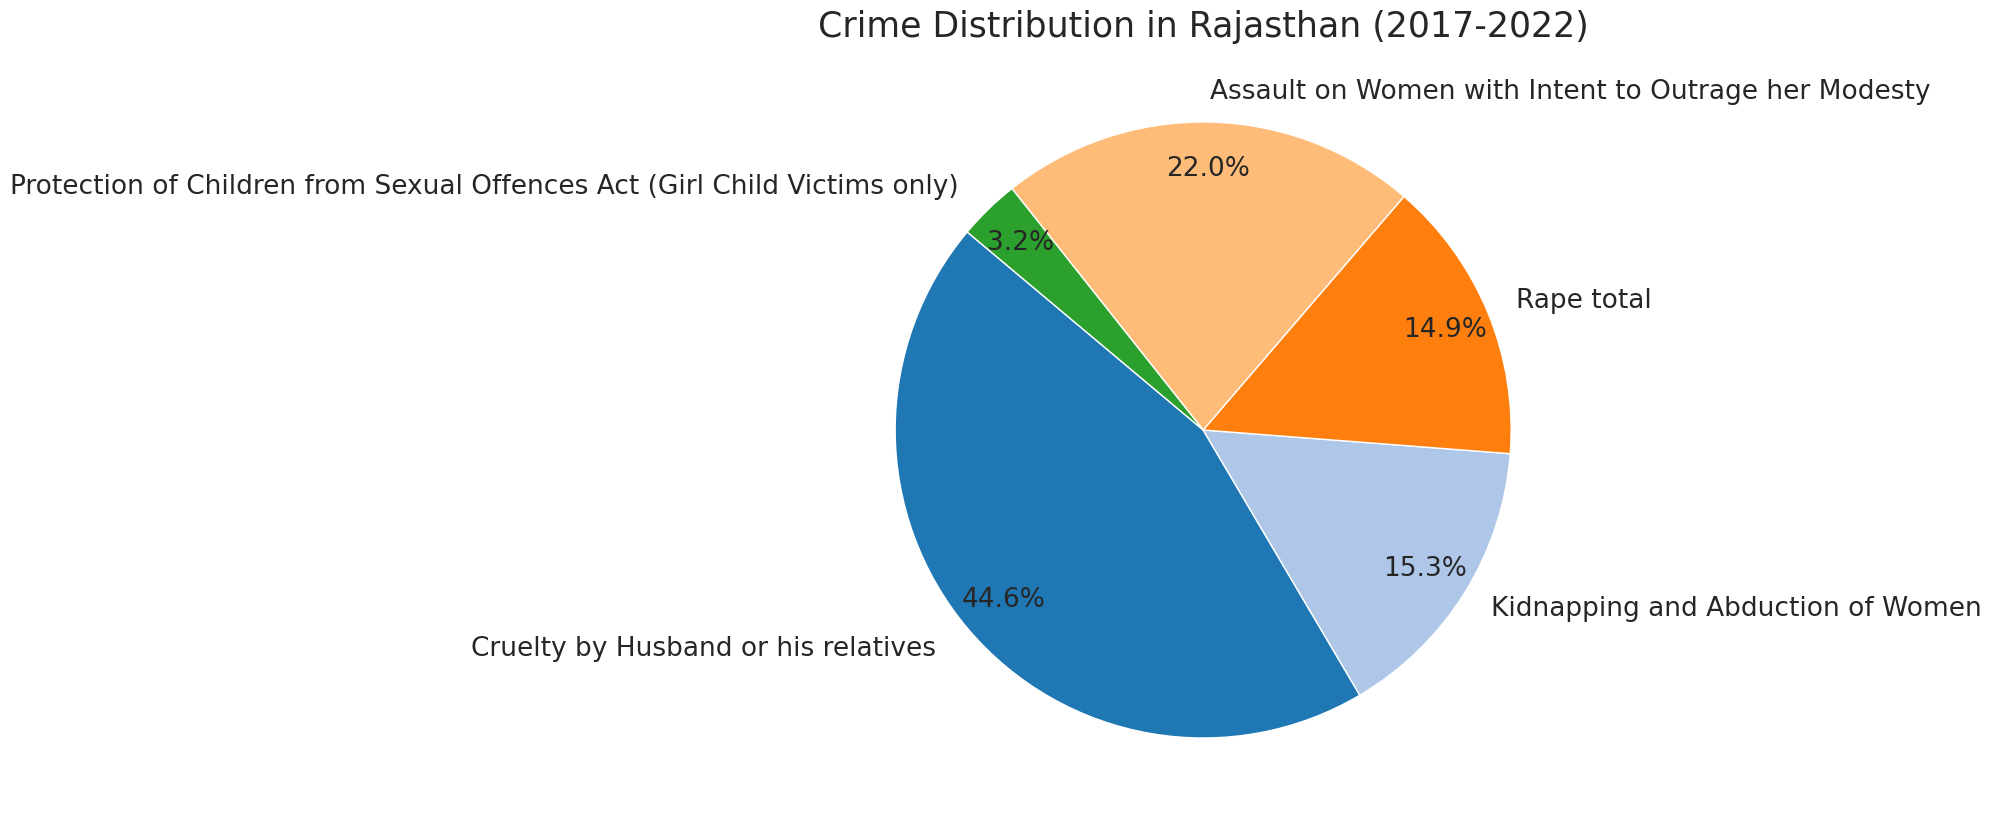

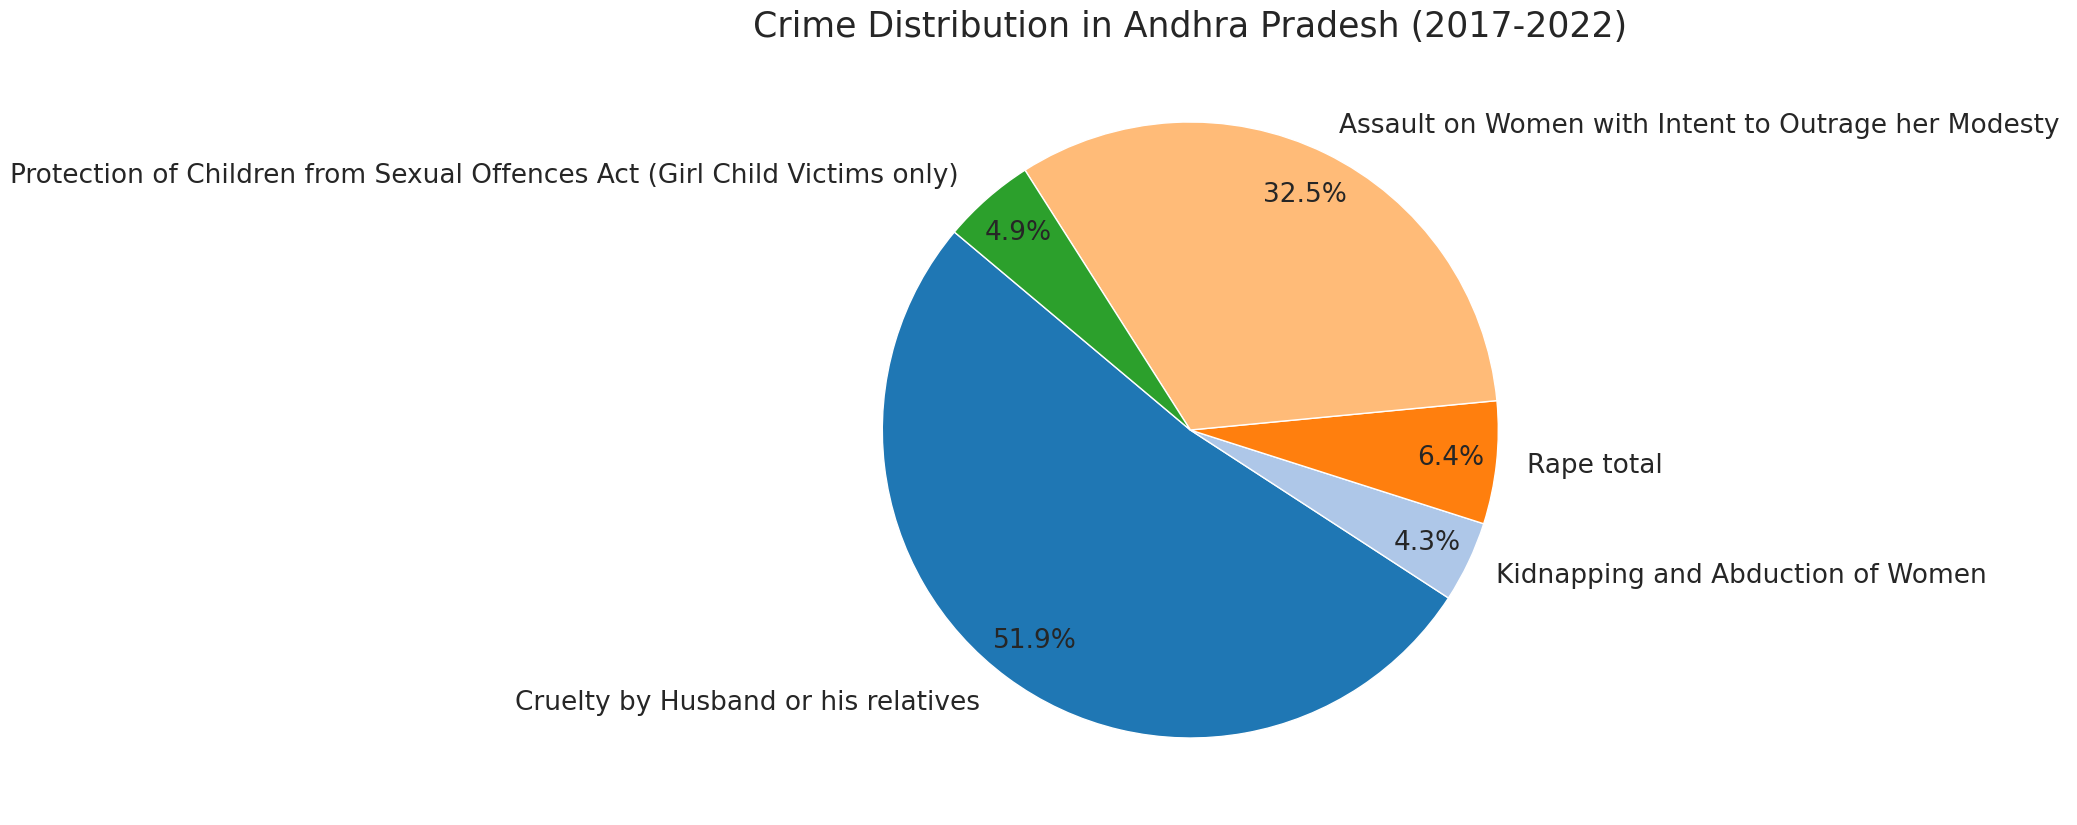

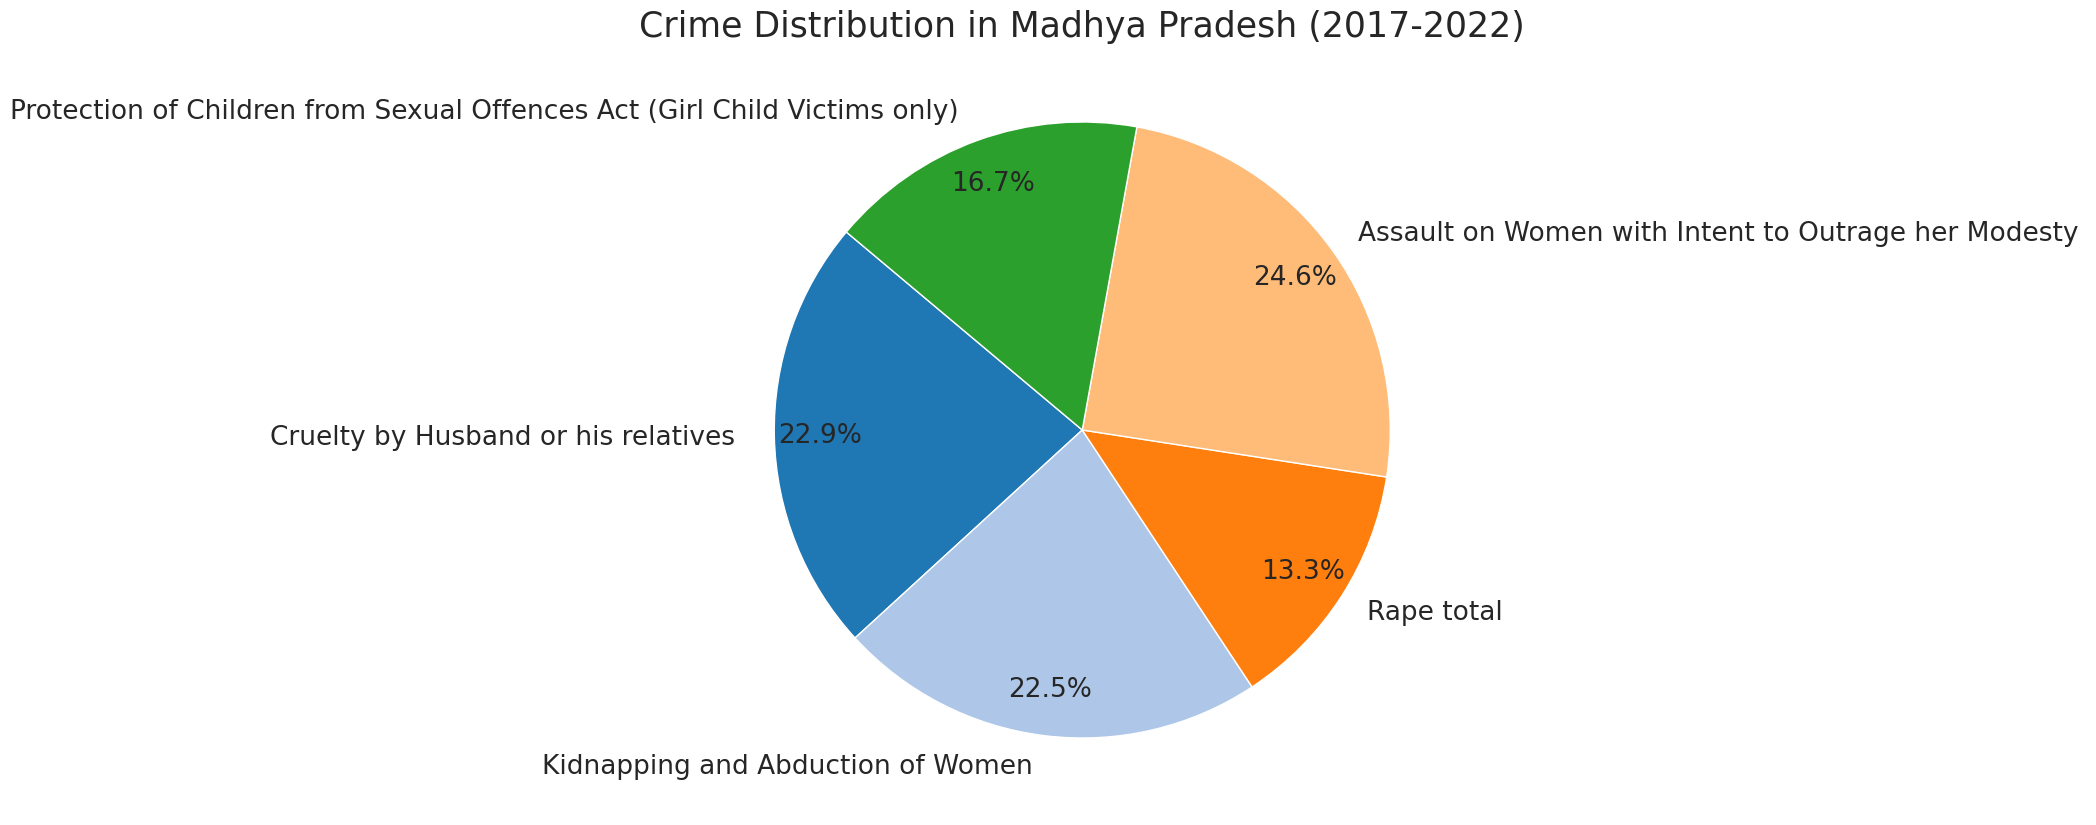

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets
population_df = pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Population.csv')

# Convert population columns to numeric, handling any commas or non-numeric characters
for year in [2017, 2018, 2019, 2020, 2021, 2022]:
    population_df[str(year)] = population_df[str(year)].replace(',', '', regex=True).astype(float)

# Ensure the data only includes states present in the population dataset
df_filtered = df[df['State/UT'].isin(population_df['State'])]

# Filter the dataset to include only the years 2017-2022
df_filtered = df_filtered[df_filtered['Year'].isin([2017, 2018, 2019, 2020, 2021, 2022])]

# Sum the total crimes across all years for each state
total_crimes_per_state = df_filtered.groupby('State/UT')['Total Crime against Women'].sum().reset_index()

# Sum the population across all years for each state
population_df['Total Population'] = population_df[[str(year) for year in [2017, 2018, 2019, 2020, 2021, 2022]]].sum(axis=1)

# Merge the total crimes with the summed population data
merged_df = pd.merge(total_crimes_per_state, population_df[['State', 'Total Population']], left_on='State/UT', right_on='State', how='left')

# Calculate crime rate as a percentage of the population
merged_df['Crime Rate (%)'] = (merged_df['Total Crime against Women'] / merged_df['Total Population']) * 100

# Sort the data by crime rate and select the top 7 states
top_7_states = merged_df.sort_values('Crime Rate (%)', ascending=False).head(7)['State/UT'].tolist()

# Filter the original dataset to include only these top 7 states
df_top_7 = df_filtered[df_filtered['State/UT'].isin(top_7_states)]

# Define the crime columns
crime_columns = [
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Rape total',
    'Assault on Women with Intent to Outrage her Modesty ',
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) '
]

# Sum the crimes for each type across all years for the top 7 states
crime_sums_by_state = {}
for state in top_7_states:
    df_state = df_top_7[df_top_7['State/UT'] == state]
    crime_sums = df_state[crime_columns].sum()
    crime_sums_by_state[state] = crime_sums

# Define a color palette with a variety of colors
colors = plt.get_cmap('tab20').colors

# Plot pie charts for each of the top 7 states
for state, crime_sums in crime_sums_by_state.items():
    plt.figure(figsize=(12, 10))
    plt.pie(crime_sums,
            labels=crime_columns,
            autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',
            startangle=140,
            colors=colors,
            pctdistance=0.85,
            textprops={'fontsize': 19})  # Adjust the font size here
    plt.title(f'Crime Distribution in {state} (2017-2022)', fontsize=25)  # Adjust the title font size here
    plt.show()


Mean Squared Error: 281737483.7050278


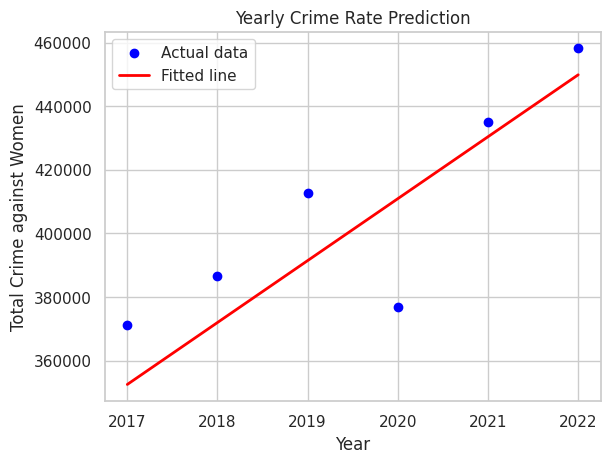

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Example DataFrame using the provided structure
# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your data



# Aggregate data by year
df_agg = df.groupby('Year', as_index=False)['Total Crime against Women'].sum()

# Features and target
X = df_agg[['Year']]
y = df_agg['Total Crime against Women']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting
plt.scatter(df_agg['Year'], df_agg['Total Crime against Women'], color='blue', label='Actual data')
plt.plot(df_agg['Year'], model.predict(X[['Year']]), color='red', linewidth=2, label='Fitted line')
plt.xlabel('Year')
plt.ylabel('Total Crime against Women')
plt.title('Yearly Crime Rate Prediction')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 281737483.7050278
Mean Absolute Error (MAE): 16664.550000000745
R-squared (R²): -3.7144329389837356


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial features
poly = PolynomialFeatures(degree=2)  # You can experiment with different degrees
X_poly = poly.fit_transform(X)

# Create a pipeline with polynomial features and linear regression
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
model_poly.fit(X, y)

# Make predictions
y_pred_poly = model_poly.predict(X)

# Calculate performance metrics for polynomial regression
mse_poly = mean_squared_error(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f"Mean Squared Error (Polynomial): {mse_poly}")
print(f"Mean Absolute Error (Polynomial): {mae_poly}")
print(f"R-squared (Polynomial): {r2_poly}")


Mean Squared Error (Polynomial): 245227615.49469054
Mean Absolute Error (Polynomial): 12098.19999885559
R-squared (Polynomial): 0.7562454810586534


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


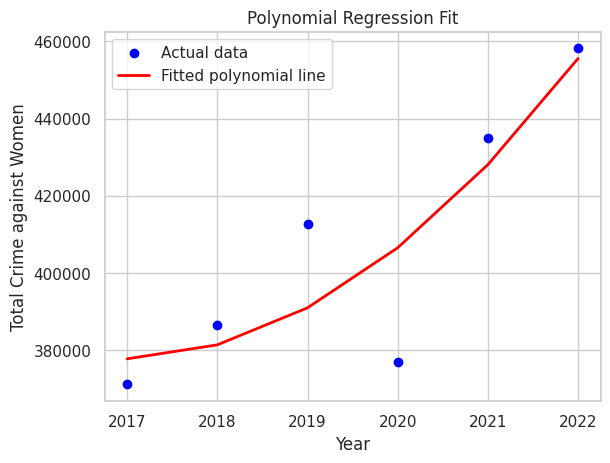

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the values for better visualization
X_sorted = np.sort(X.values, axis=0)
y_pred_poly_sorted = model_poly.predict(X_sorted)

# Plotting
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_sorted, y_pred_poly_sorted, color='red', linewidth=2, label='Fitted polynomial line')
plt.xlabel('Year')
plt.ylabel('Total Crime against Women')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


In [ ]:
# Try a higher degree polynomial
poly = PolynomialFeatures(degree=4)  # Experiment with different degrees
model_poly_high = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_poly_high.fit(X, y)
y_pred_poly_high = model_poly_high.predict(X)

# Calculate performance metrics
mse_poly_high = mean_squared_error(y, y_pred_poly_high)
mae_poly_high = mean_absolute_error(y, y_pred_poly_high)
r2_poly_high = r2_score(y, y_pred_poly_high)

print(f"Mean Squared Error (High-Degree Polynomial): {mse_poly_high}")
print(f"Mean Absolute Error (High-Degree Polynomial): {mae_poly_high}")
print(f"R-squared (High-Degree Polynomial): {r2_poly_high}")


Mean Squared Error (High-Degree Polynomial): 192218229.3455709
Mean Absolute Error (High-Degree Polynomial): 10835.97265625
R-squared (High-Degree Polynomial): 0.8089364367411487


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


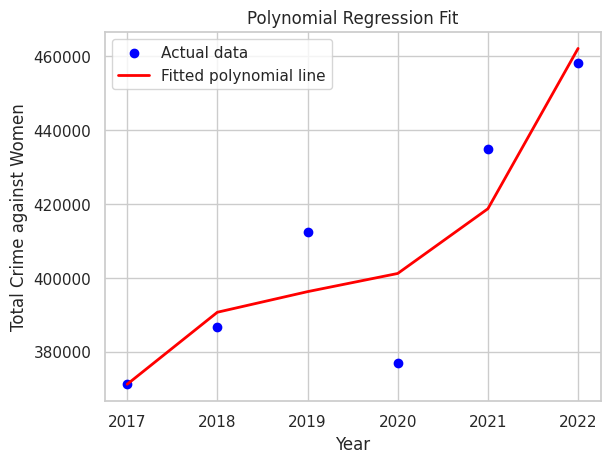

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the values for better visualization
X_sorted = np.sort(X.values, axis=0)
y_pred_poly_sorted = model_poly_high.predict(X_sorted)

# Plotting
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_sorted, y_pred_poly_sorted, color='red', linewidth=2, label='Fitted polynomial line')
plt.xlabel('Year')
plt.ylabel('Total Crime against Women')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()


Mean Squared Error (Random Forest): 104912033.57231688
Mean Absolute Error (Random Forest): 9329.491666666678
R-squared (Random Forest): 0.8957181791170163


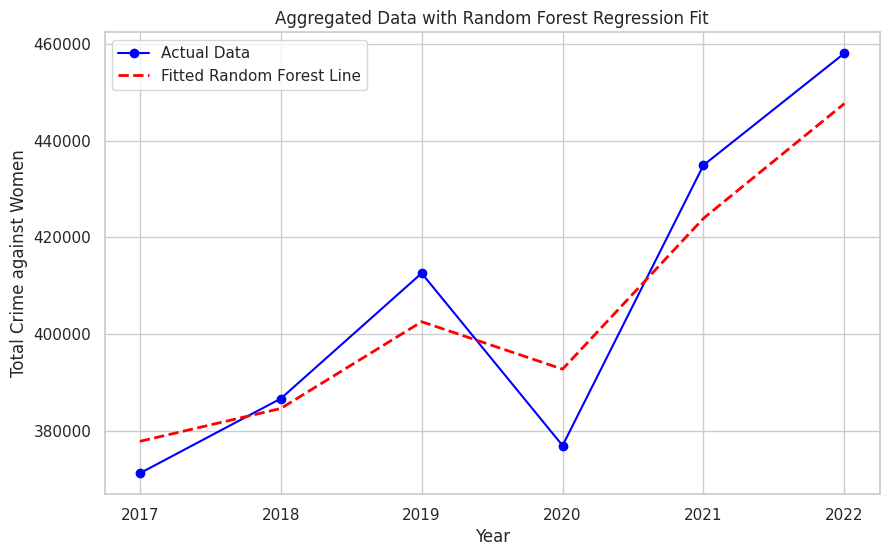

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample dataset (replace this with your actual data loading)
df=pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')
# Aggregate the data by year
df_agg = df.groupby('Year').sum().reset_index()

# Prepare data for Random Forest model
X = df_agg['Year'].values.reshape(-1, 1)  # Feature matrix
y = df_agg['Total Crime against Women']

# Initialize and fit the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Make predictions
df_agg['Random Forest Predicted'] = model_rf.predict(X)

# Calculate performance metrics
mse_rf = mean_squared_error(y, df_agg['Random Forest Predicted'])
mae_rf = mean_absolute_error(y, df_agg['Random Forest Predicted'])
r2_rf = r2_score(y, df_agg['Random Forest Predicted'])

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Mean Absolute Error (Random Forest): {mae_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_agg['Year'], df_agg['Total Crime against Women'], color='blue', marker='o', label='Actual Data')
plt.plot(df_agg['Year'], df_agg['Random Forest Predicted'], color='red', linestyle='--', linewidth=2, label='Fitted Random Forest Line')
plt.xlabel('Year')
plt.ylabel('Total Crime against Women')
plt.title('Aggregated Data with Random Forest Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')
from sklearn.preprocessing import StandardScaler



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example DataFrame
df=pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')

# Ensure encoding and necessary columns are included
df['Category'] = df['Category'].astype('category').cat.codes
df['State/UT'] = df['State/UT'].astype('category').cat.codes

# Include the 'Year' column in features
X = df[['Year', 'Category', 'State/UT']]
# y = df['Rape total']
y = df['Kidnapping and Abduction of Women ']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 10920554.81400632
R-squared: 0.03803199402774038


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)







Random Forest Mean Squared Error: 1217315.937113846
Random Forest R-squared: 0.8927692773299621


In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


    Feature  Importance
2  State/UT    0.906391
0      Year    0.062147
1  Category    0.031462


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the corrected hyperparameter grid
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=param_distributions,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1,
                               error_score='raise')

# Perform the random search
try:
    rf_random.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during fitting: {e}")

# If successful, proceed with evaluation
if hasattr(rf_random, 'best_estimator_'):
    best_rf_model = rf_random.best_estimator_
    y_pred_rf = best_rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print("Best Parameters:", rf_random.best_params_)
    print("Random Forest Mean Squared Error:", mse_rf)
    print("Random Forest R-squared:", r2_rf)
else:
    print("Hyperparameter tuning did not complete successfully.")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': False}
Random Forest Mean Squared Error: 817730.295133438
Random Forest R-squared: 0.9279679105292603


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define custom scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for MSE
mse_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=mse_scorer)
mse_mean = -np.mean(mse_scores)  # Negative because MSE should be minimized
print(f"Cross-Validated Mean Squared Error: {mse_mean}")

# Perform cross-validation for R-squared
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=r2_scorer)
r2_mean = np.mean(r2_scores)
print(f"Cross-Validated R-squared: {r2_mean}")


Cross-Validated Mean Squared Error: 3016649.566337548
Cross-Validated R-squared: 0.6217891489831427


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')

# Ensure encoding and necessary columns are included
df['Category'] = df['Category'].astype('category').cat.codes
df['State/UT'] = df['State/UT'].astype('category').cat.codes

# Include the 'Year' column in features
X = df[['Year', 'Category', 'State/UT']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
degree = 4  # Increased polynomial degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_scaled)

# Crime categories to analyze
crime_categories = [
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Rape total',
    'Assault on Women with Intent to Outrage her Modesty ',
    'Insult to the Modesty of Women',
    'Total Crime against Women'

]

# Initialize dictionary to store results
results = {}

# Loop over each crime category and calculate R-squared values
for crime in crime_categories:
    # Define the target variable
    y = df[crime]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # Ridge Regression (with regularization)
    alpha = 1.0  # Regularization strength
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[crime] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }

    # Cross-Validation
    cv_scores = cross_val_score(ridge_model, X_poly, y, cv=5, scoring='r2')
    results[crime]['Cross-Validation R-squared Scores'] = cv_scores
    results[crime]['Mean Cross-Validation R-squared'] = cv_scores.mean()

# Print the results
for crime, metrics in results.items():
    print(f"Results for {crime}:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-squared: {metrics['R-squared']}")
    print(f"Cross-Validation R-squared Scores: {metrics['Cross-Validation R-squared Scores']}")
    print(f"Mean Cross-Validation R-squared: {metrics['Mean Cross-Validation R-squared']}")
    print("-" * 50)


Results for Cruelty by Husband or his relatives :
Mean Squared Error: 22083125.552506074
R-squared: 0.20046718229867855
Cross-Validation R-squared Scores: [ 0.01119047  0.29025845  0.26327509  0.25947065 -0.54443876]
Mean Cross-Validation R-squared: 0.05595118037945577
--------------------------------------------------
Results for Kidnapping and Abduction of Women :
Mean Squared Error: 10804618.075471262
R-squared: 0.048244610061172644
Cross-Validation R-squared Scores: [-0.07309421  0.098891    0.15684814  0.07745512  0.06414657]
Mean Cross-Validation R-squared: 0.0648493239285178
--------------------------------------------------
Results for Rape total:
Mean Squared Error: 1363922.6599623403
R-squared: 0.017789341150680094
Cross-Validation R-squared Scores: [-0.03999884  0.09172513  0.07192368 -0.05273228  0.09623203]
Mean Cross-Validation R-squared: 0.033429943035335044
--------------------------------------------------
Results for Assault on Women with Intent to Outrage her Modesty

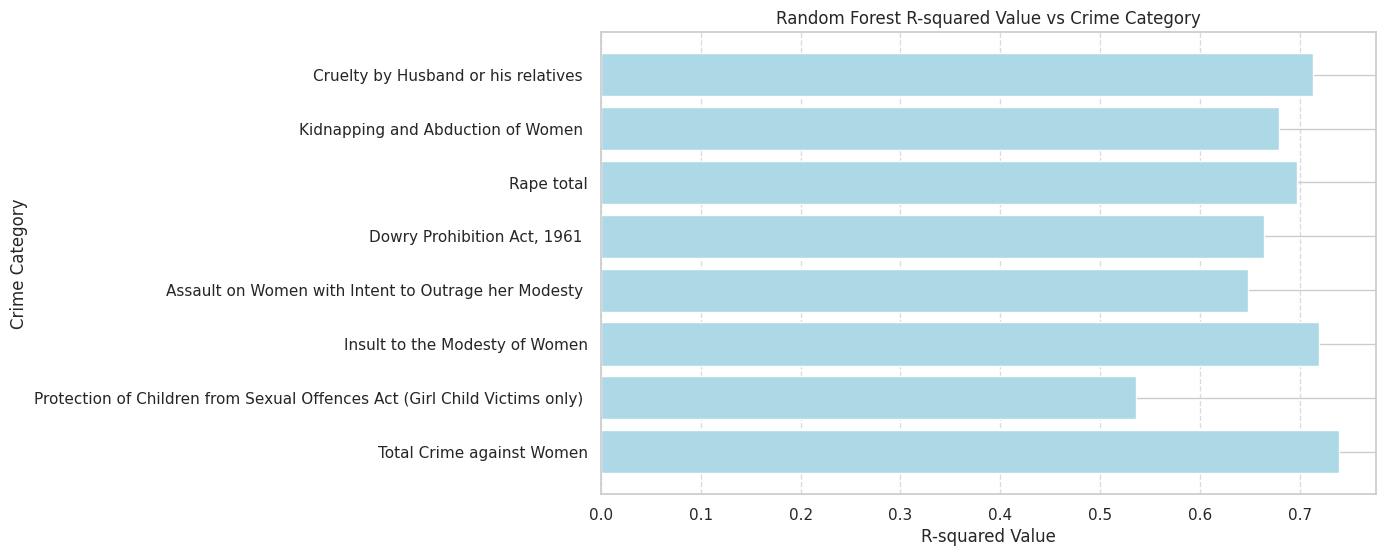

Results for Cruelty by Husband or his relatives :
Random Forest Mean Squared Error: 7933656.8815569235
Random Forest Root Mean Squared Error: 2816.6747915861574
Random Forest Mean Absolute Error: 1869.7729230769235
Random Forest R-squared: 0.7127571898233023
Random Forest Cross-Validation R-squared Scores: [0.86601089 0.92822032 0.83969314 0.9189578  0.89000077]
Mean Cross-Validation R-squared: 0.8885765849940082
--------------------------------------------------
Results for Kidnapping and Abduction of Women :
Random Forest Mean Squared Error: 3643237.3485615393
Random Forest Root Mean Squared Error: 1908.726630128458
Random Forest Mean Absolute Error: 1168.534923076923
Random Forest R-squared: 0.6790751177784091
Random Forest Cross-Validation R-squared Scores: [0.86099636 0.93101081 0.85977794 0.82626053 0.89623023]
Mean Cross-Validation R-squared: 0.8748551742387454
--------------------------------------------------
Results for Rape total:
Random Forest Mean Squared Error: 421000.486

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')

# Ensure encoding and necessary columns are included
df['Category'] = df['Category'].astype('category').cat.codes
df['State/UT'] = df['State/UT'].astype('category').cat.codes

# Include the 'Year' column in features
X = df[['Year', 'Category', 'State/UT']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
degree = 4  # Increased polynomial degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_scaled)

# Crime categories to analyze
crime_categories = [
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Rape total',
    'Dowry Prohibition Act, 1961 ',
    'Assault on Women with Intent to Outrage her Modesty ',
    'Insult to the Modesty of Women',
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ',
    'Total Crime against Women'
]

# Initialize dictionary to store results
results_rf = {}

# Loop over each crime category and calculate metrics using Random Forest
for crime in crime_categories:
    # Define the target variable
    y = df[crime]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # Random Forest Regression
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    rmse_rf = mse_rf ** 0.5  # Root Mean Squared Error
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    # Store results
    results_rf[crime] = {
        'Random Forest Mean Squared Error': mse_rf,
        'Random Forest Root Mean Squared Error': rmse_rf,
        'Random Forest Mean Absolute Error': mae_rf,
        'Random Forest R-squared': r2_rf
    }

    # Cross-Validation
    cv_scores_rf = cross_val_score(rf_model, X_poly, y, cv=5, scoring='r2')
    results_rf[crime]['Random Forest Cross-Validation R-squared Scores'] = cv_scores_rf
    results_rf[crime]['Mean Cross-Validation R-squared'] = cv_scores_rf.mean()

# Extract the crime names and corresponding R-squared values for Random Forest
crime_names = list(results_rf.keys())
r2_values_rf = [metrics.get('Random Forest R-squared', 0) for metrics in results_rf.values()]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(crime_names, r2_values_rf, color='lightblue')
plt.xlabel('R-squared Value')
plt.ylabel('Crime Category')
plt.title('Random Forest R-squared Value vs Crime Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis to have the highest R-squared at the top
plt.gca().invert_yaxis()

plt.show()

# Print the results including RMSE and MAE
for crime, metrics in results_rf.items():
    print(f"Results for {crime}:")
    print(f"Random Forest Mean Squared Error: {metrics['Random Forest Mean Squared Error']}")
    print(f"Random Forest Root Mean Squared Error: {metrics['Random Forest Root Mean Squared Error']}")
    print(f"Random Forest Mean Absolute Error: {metrics['Random Forest Mean Absolute Error']}")
    print(f"Random Forest R-squared: {metrics['Random Forest R-squared']}")
    print(f"Random Forest Cross-Validation R-squared Scores: {metrics['Random Forest Cross-Validation R-squared Scores']}")
    print(f"Mean Cross-Validation R-squared: {metrics['Mean Cross-Validation R-squared']}")
    print("-" * 50)


Results for Cruelty by Husband or his relatives :
Gradient Boosting Mean Squared Error: 2740649.768877654
Gradient Boosting Mean Absolute Error: 1156.7295881004652
Gradient Boosting Root Mean Squared Error: 1655.4907939573852
Gradient Boosting R-squared: 0.9007731298346688
Gradient Boosting Recall: 0.875
Gradient Boosting F1 Score: 0.7999999999999999
Gradient Boosting Cross-Validation RMSE: 1436.9569684807434
Gradient Boosting Cross-Validation R-squared Scores: [0.9001302  0.96387334 0.90849195 0.97179154 0.82750034]
Mean Cross-Validation R-squared: 0.914357475184001
--------------------------------------------------
Results for Kidnapping and Abduction of Women :
Gradient Boosting Mean Squared Error: 1817800.6683302207
Gradient Boosting Mean Absolute Error: 905.6504887979816
Gradient Boosting Root Mean Squared Error: 1348.2583833710141
Gradient Boosting R-squared: 0.8398738787588076
Gradient Boosting Recall: 0.85
Gradient Boosting F1 Score: 0.7906976744186046
Gradient Boosting Cross-V

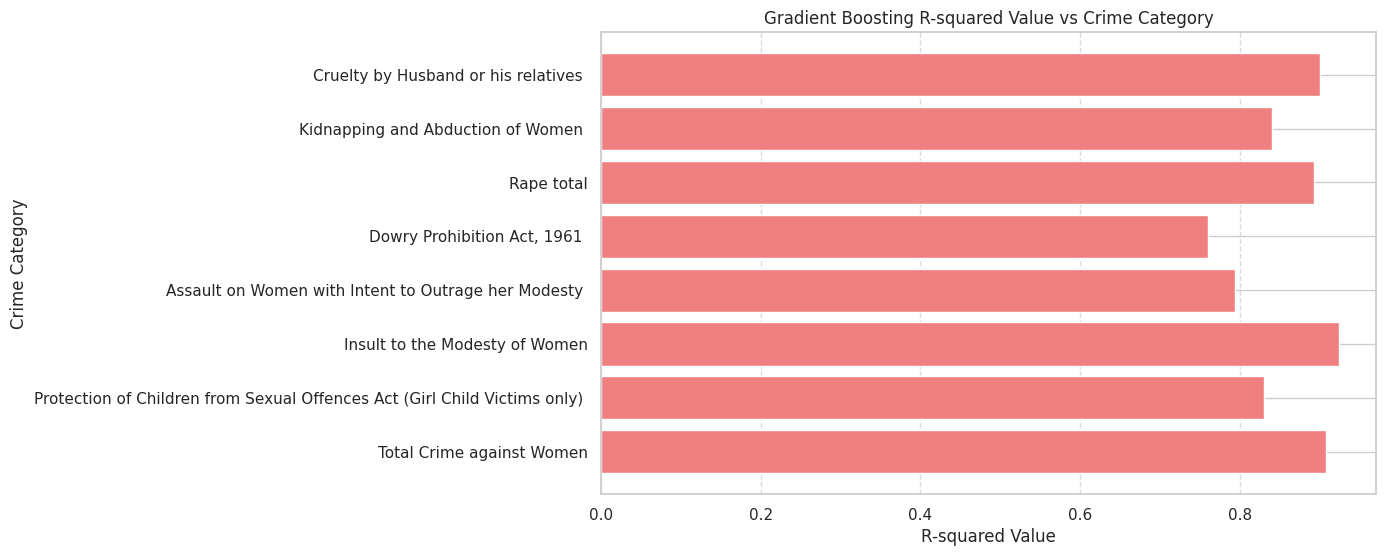

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')

# Ensure encoding and necessary columns are included
df['Category'] = df['Category'].astype('category').cat.codes
df['State/UT'] = df['State/UT'].astype('category').cat.codes

# Include the 'Year' column in features
X = df[['Year', 'Category', 'State/UT']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
degree = 4  # Increased polynomial degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_scaled)

# Crime categories to analyze
crime_categories = [
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Rape total',
    'Dowry Prohibition Act, 1961 ',
    'Assault on Women with Intent to Outrage her Modesty ',
    'Insult to the Modesty of Women',
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ',
    'Total Crime against Women'
]

# Initialize dictionary to store results
results = {}

# Loop over each crime category and calculate metrics using Gradient Boosting
for crime in crime_categories:
    # Define the target variable
    y = df[crime]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # Gradient Boosting Regression
    gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gb_model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred_gb = gb_model.predict(X_test)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    mae_gb = mean_absolute_error(y_test, y_pred_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_pred_gb)

    # Since F1 Score and Recall are typically for classification, we need to convert the problem to classification
    threshold = y_test.mean()  # You can adjust the threshold based on your problem
    y_test_class = (y_test >= threshold).astype(int)
    y_pred_class = (y_pred_gb >= threshold).astype(int)

    recall_gb = recall_score(y_test_class, y_pred_class)
    f1_gb = f1_score(y_test_class, y_pred_class)

    # Store results
    results[crime] = {
        'Gradient Boosting Mean Squared Error': mse_gb,
        'Gradient Boosting Mean Absolute Error': mae_gb,
        'Gradient Boosting Root Mean Squared Error': rmse_gb,
        'Gradient Boosting R-squared': r2_gb,
        'Gradient Boosting Recall': recall_gb,
        'Gradient Boosting F1 Score': f1_gb
    }

    # Cross-Validation
    cv_predictions_gb = cross_val_predict(gb_model, X_poly, y, cv=5)
    cv_rmse_gb = np.sqrt(mean_squared_error(y, cv_predictions_gb))
    cv_scores_gb = cross_val_score(gb_model, X_poly, y, cv=5, scoring='r2')

    results[crime]['Gradient Boosting Cross-Validation RMSE'] = cv_rmse_gb
    results[crime]['Gradient Boosting Cross-Validation R-squared Scores'] = cv_scores_gb
    results[crime]['Mean Cross-Validation R-squared'] = cv_scores_gb.mean()

# Print the results
for crime, metrics in results.items():
    print(f"Results for {crime}:")
    print(f"Gradient Boosting Mean Squared Error: {metrics['Gradient Boosting Mean Squared Error']}")
    print(f"Gradient Boosting Mean Absolute Error: {metrics['Gradient Boosting Mean Absolute Error']}")
    print(f"Gradient Boosting Root Mean Squared Error: {metrics['Gradient Boosting Root Mean Squared Error']}")
    print(f"Gradient Boosting R-squared: {metrics['Gradient Boosting R-squared']}")
    print(f"Gradient Boosting Recall: {metrics['Gradient Boosting Recall']}")
    print(f"Gradient Boosting F1 Score: {metrics['Gradient Boosting F1 Score']}")
    print(f"Gradient Boosting Cross-Validation RMSE: {metrics['Gradient Boosting Cross-Validation RMSE']}")
    print(f"Gradient Boosting Cross-Validation R-squared Scores: {metrics['Gradient Boosting Cross-Validation R-squared Scores']}")
    print(f"Mean Cross-Validation R-squared: {metrics['Mean Cross-Validation R-squared']}")
    print("-" * 50)

import matplotlib.pyplot as plt

# Extract the crime names and corresponding R-squared values for Gradient Boosting
crime_names = list(results.keys())
r2_values_gb = [metrics.get('Gradient Boosting R-squared', 0) for metrics in results.values()]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(crime_names, r2_values_gb, color='lightcoral')
plt.xlabel('R-squared Value')
plt.ylabel('Crime Category')
plt.title('Gradient Boosting R-squared Value vs Crime Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis to have the highest R-squared at the top
plt.gca().invert_yaxis()

plt.show()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

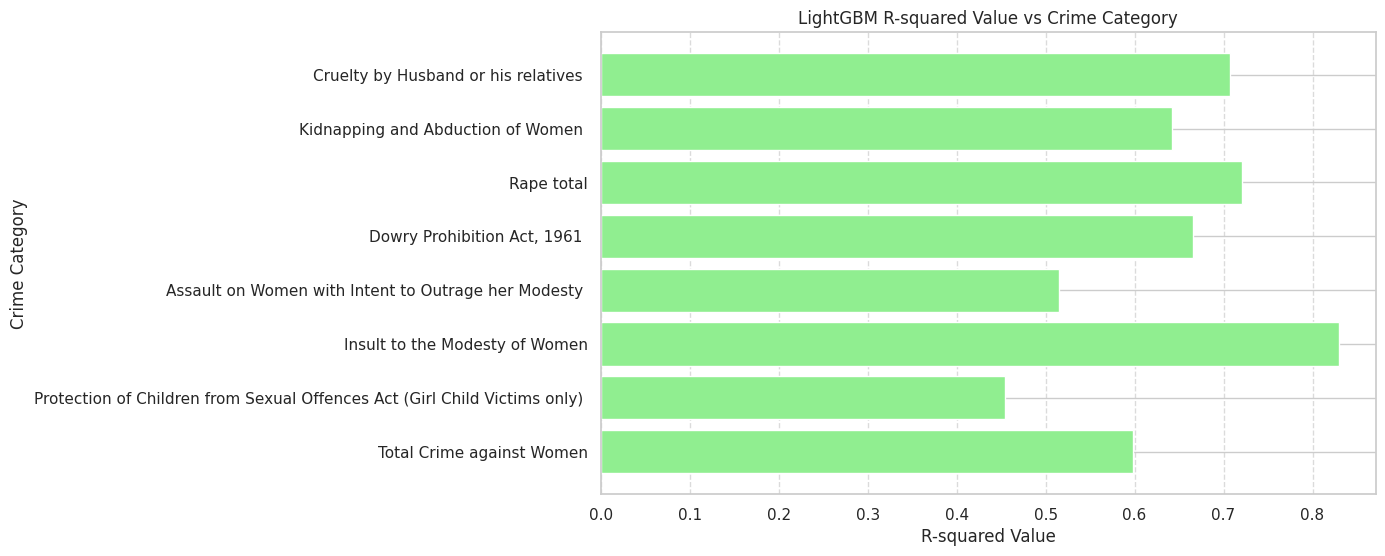

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset_ML24/Copy of Crime against Women Final Dataset.csv')

# Ensure encoding and necessary columns are included
df['Category'] = df['Category'].astype('category').cat.codes
df['State/UT'] = df['State/UT'].astype('category').cat.codes

# Include the 'Year' column in features
X = df[['Year', 'Category', 'State/UT']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
degree = 4  # Increased polynomial degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_scaled)

# Crime categories to analyze
crime_categories = [
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Rape total',
    'Dowry Prohibition Act, 1961 ',

    'Assault on Women with Intent to Outrage her Modesty ',
    'Insult to the Modesty of Women',
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ',
    'Total Crime against Women'
]

# Initialize dictionary to store results
results_lgb = {}

# Loop over each crime category and calculate metrics using LightGBM
for crime in crime_categories:
    # Define the target variable
    y = df[crime]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    # LightGBM Regression
    lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
    lgb_model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred_lgb = lgb_model.predict(X_test)
    mse_lgb = mean_squared_error(y_test, y_pred_lgb)
    mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
    rmse_lgb = np.sqrt(mse_lgb)
    r2_lgb = r2_score(y_test, y_pred_lgb)

    # Since F1 Score and Recall are typically for classification, we need to convert the problem to classification
    threshold = y_test.mean()  # You can adjust the threshold based on your problem
    y_test_class = (y_test >= threshold).astype(int)
    y_pred_class = (y_pred_lgb >= threshold).astype(int)

    recall_lgb = recall_score(y_test_class, y_pred_class)
    f1_lgb = f1_score(y_test_class, y_pred_class)

    # Store results
    results_lgb[crime] = {
        'LightGBM Mean Squared Error': mse_lgb,
        'LightGBM Mean Absolute Error': mae_lgb,
        'LightGBM Root Mean Squared Error': rmse_lgb,
        'LightGBM R-squared': r2_lgb,
        'LightGBM Recall': recall_lgb,
        'LightGBM F1 Score': f1_lgb
    }

    # Cross-Validation
    cv_scores_lgb = cross_val_score(lgb_model, X_poly, y, cv=5, scoring='r2')
    results_lgb[crime]['LightGBM Cross-Validation R-squared Scores'] = cv_scores_lgb
    results_lgb[crime]['Mean Cross-Validation R-squared'] = cv_scores_lgb.mean()

# Print the results
for crime, metrics in results_lgb.items():
    print(f"Results for {crime}:")
    print(f"LightGBM Mean Squared Error: {metrics['LightGBM Mean Squared Error']}")
    print(f"LightGBM Mean Absolute Error: {metrics['LightGBM Mean Absolute Error']}")
    print(f"LightGBM Root Mean Squared Error: {metrics['LightGBM Root Mean Squared Error']}")
    print(f"LightGBM R-squared: {metrics['LightGBM R-squared']}")
    print(f"LightGBM Recall: {metrics['LightGBM Recall']}")
    print(f"LightGBM F1 Score: {metrics['LightGBM F1 Score']}")
    print(f"LightGBM Cross-Validation R-squared Scores: {metrics['LightGBM Cross-Validation R-squared Scores']}")
    print(f"Mean Cross-Validation R-squared: {metrics['Mean Cross-Validation R-squared']}")
    print("-" * 50)

# Extract the crime names and corresponding R-squared values for LightGBM
crime_names = list(results_lgb.keys())
r2_values_lgb = [metrics.get('LightGBM R-squared', 0) for metrics in results_lgb.values()]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(crime_names, r2_values_lgb, color='lightgreen')
plt.xlabel('R-squared Value')
plt.ylabel('Crime Category')
plt.title('LightGBM R-squared Value vs Crime Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert y-axis to have the highest R-squared at the top
plt.gca().invert_yaxis()

plt.show()


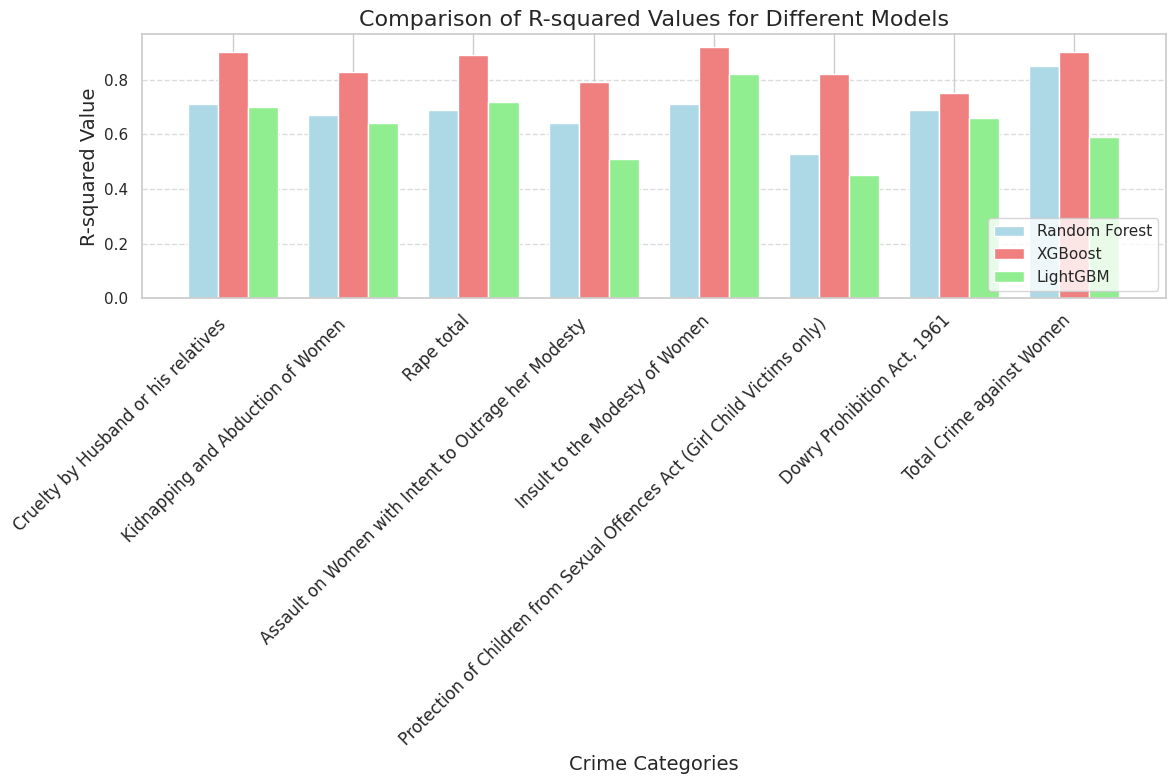

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the R-squared values for each crime and model
# Example dictionaries for each model (you need to fill these with your actual data)
r2_values_rf = {
    'Cruelty by Husband or his relatives ': 0.71,
    'Kidnapping and Abduction of Women ': 0.67,
    'Rape total': 0.69,
    'Assault on Women with Intent to Outrage her Modesty ': 0.64,
    'Insult to the Modesty of Women': 0.71,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 0.53,
    'Dowry Prohibition Act, 1961': 0.69,
    'Total Crime against Women': 0.85
}

r2_values_xgb = {
    'Cruelty by Husband or his relatives ': 0.90,
    'Kidnapping and Abduction of Women ': 0.83,
    'Rape total': 0.89,
    'Assault on Women with Intent to Outrage her Modesty ': 0.79,
    'Insult to the Modesty of Women': 0.92,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 0.82,
    'Dowry Prohibition Act, 1961': 0.75,
    'Total Crime against Women': 0.90
}

r2_values_lgb = {
    'Cruelty by Husband or his relatives ': 0.70,
    'Kidnapping and Abduction of Women ': 0.64,
    'Rape total': 0.72,
    'Assault on Women with Intent to Outrage her Modesty ': 0.51,
    'Insult to the Modesty of Women': 0.82,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 0.45,
    'Dowry Prohibition Act, 1961': 0.66,
    'Total Crime against Women': 0.59
}

# Crimes to compare
crime_categories = [
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Rape total',
    'Assault on Women with Intent to Outrage her Modesty ',
    'Insult to the Modesty of Women',
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ',
    'Dowry Prohibition Act, 1961',
    'Total Crime against Women'
]

# Number of categories
n = len(crime_categories)

# Bar width
bar_width = 0.25

# Index for crime categories
index = np.arange(n)

# Creating the bar plots
plt.figure(figsize=(12, 8))

plt.bar(index, [r2_values_rf[crime] for crime in crime_categories], bar_width, label='Random Forest', color='lightblue')
plt.bar(index + bar_width, [r2_values_xgb[crime] for crime in crime_categories], bar_width, label='XGBoost', color='lightcoral')
plt.bar(index + 2 * bar_width, [r2_values_lgb[crime] for crime in crime_categories], bar_width, label='LightGBM', color='lightgreen')

# Adding labels
plt.xlabel('Crime Categories', fontsize=14)
plt.ylabel('R-squared Value', fontsize=14)
plt.title('Comparison of R-squared Values for Different Models', fontsize=16)
plt.xticks(index + bar_width, crime_categories, rotation=45, ha="right", fontsize=12)
plt.legend(loc='lower right')

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Show plot
plt.show()


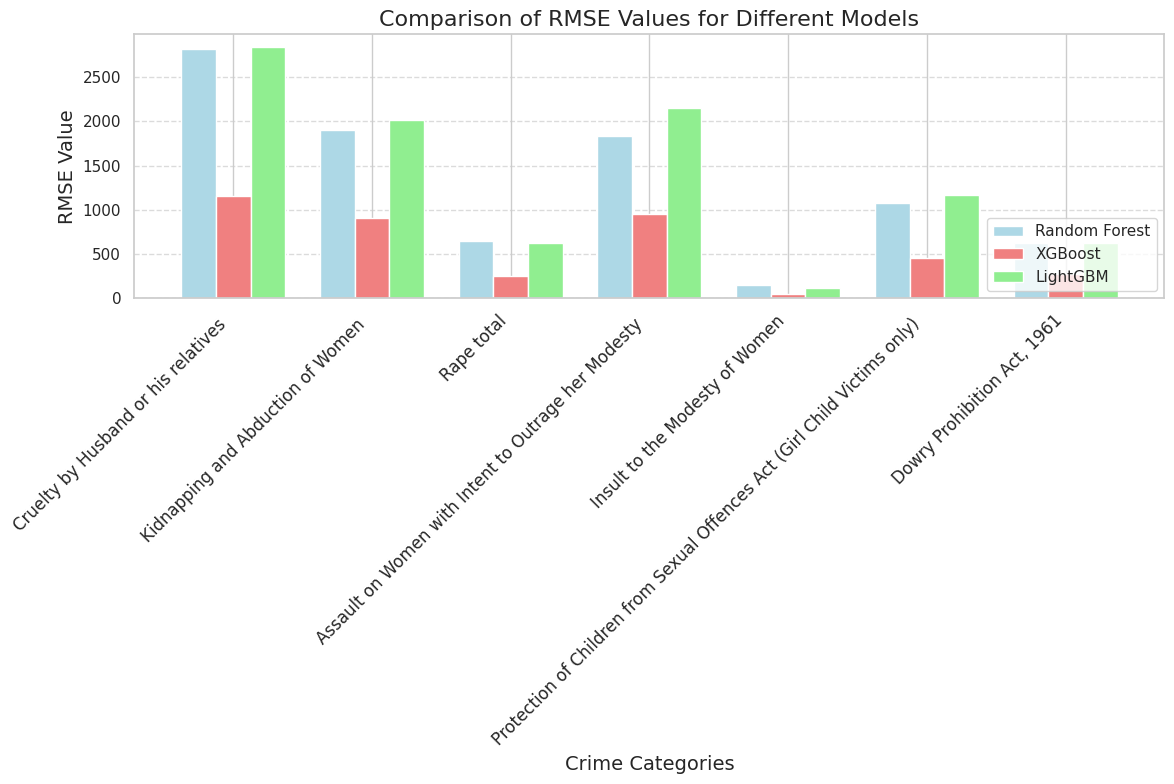

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the RMSE values for each crime and model
# Example dictionaries for each model (replace these with your actual RMSE data)
rmse_values_rf = {
    'Cruelty by Husband or his relatives ': 2816.67,
    'Kidnapping and Abduction of Women ': 1908.72,
    'Rape total': 648.84,
    'Assault on Women with Intent to Outrage her Modesty ': 1837.13,
    'Insult to the Modesty of Women': 154.18,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 1082.59,
    'Dowry Prohibition Act, 1961': 630.72
}
rmse_values_xgb = {
    'Cruelty by Husband or his relatives ': 1156.72,
    'Kidnapping and Abduction of Women ': 905.65,
    'Rape total': 255.01,
    'Assault on Women with Intent to Outrage her Modesty ': 958.38,
    'Insult to the Modesty of Women': 51.09,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 461.78,
    'Dowry Prohibition Act, 1961': 271.71
}

rmse_values_lgb = {
    'Cruelty by Husband or his relatives ': 2842.58,
    'Kidnapping and Abduction of Women ': 2014.91,
    'Rape total': 623.34,
    'Assault on Women with Intent to Outrage her Modesty ': 2155.47,
    'Insult to the Modesty of Women': 120.07,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 1173.31,
    'Dowry Prohibition Act, 1961': 629.58
}

# Crimes to compare
crime_categories = [
    'Cruelty by Husband or his relatives ',
    'Kidnapping and Abduction of Women ',
    'Rape total',
    'Assault on Women with Intent to Outrage her Modesty ',
    'Insult to the Modesty of Women',
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ',
    'Dowry Prohibition Act, 1961'
]

# Number of categories
n = len(crime_categories)

# Bar width
bar_width = 0.25

# Index for crime categories
index = np.arange(n)

# Creating the bar plots
plt.figure(figsize=(12, 8))

plt.bar(index, [rmse_values_rf[crime] for crime in crime_categories], bar_width, label='Random Forest', color='lightblue')
plt.bar(index + bar_width, [rmse_values_xgb[crime] for crime in crime_categories], bar_width, label='XGBoost', color='lightcoral')
plt.bar(index + 2 * bar_width, [rmse_values_lgb[crime] for crime in crime_categories], bar_width, label='LightGBM', color='lightgreen')

# Adding labels
plt.xlabel('Crime Categories', fontsize=14)
plt.ylabel('RMSE Value', fontsize=14)
plt.title('Comparison of RMSE Values for Different Models', fontsize=16)
plt.xticks(index + bar_width, crime_categories, rotation=45, ha="right", fontsize=12)

# Move the legend to the bottom right
plt.legend(loc='lower right')

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Show plot
plt.show()


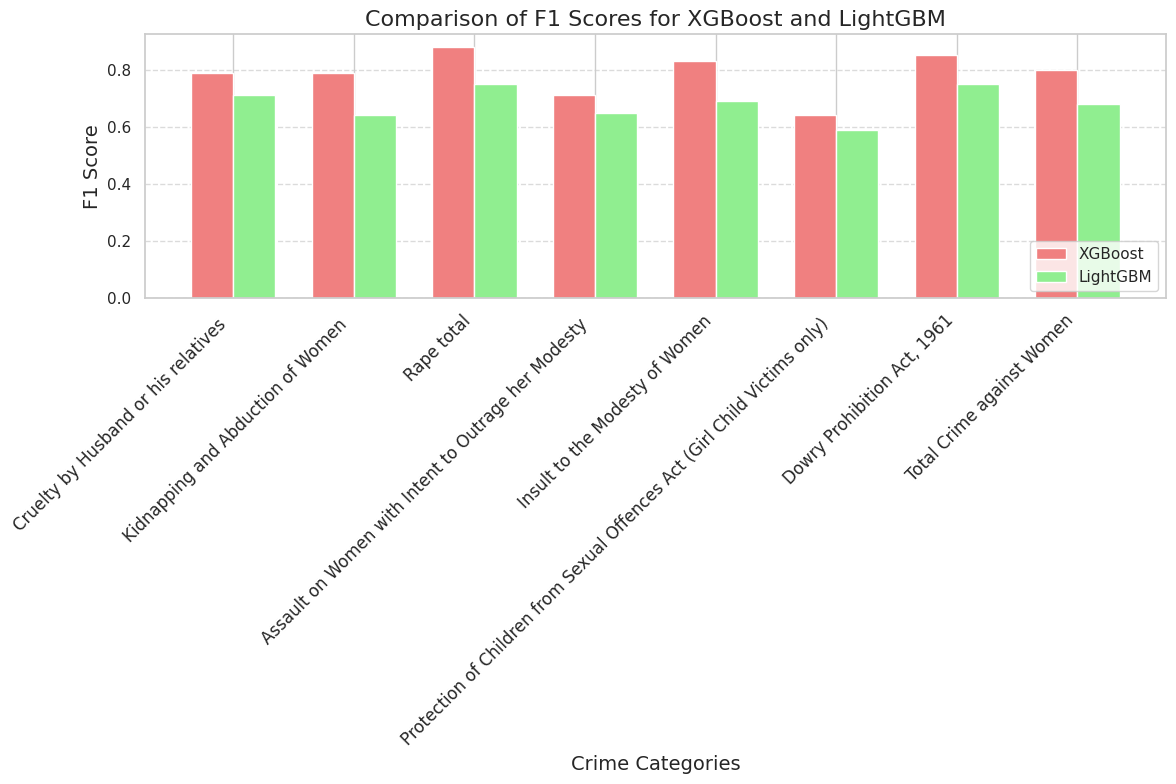

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example F1 scores for XGBoost and LightGBM (replace these with your actual data)
f1_scores_xgb = {
    'Cruelty by Husband or his relatives ': 0.79,
    'Kidnapping and Abduction of Women ': 0.79,
    'Rape total': 0.88,
    'Assault on Women with Intent to Outrage her Modesty ': 0.71,
    'Insult to the Modesty of Women': 0.83,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 0.64,
    'Dowry Prohibition Act, 1961': 0.85,
    'Total Crime against Women': 0.80
}

f1_scores_lgb = {
    'Cruelty by Husband or his relatives ': 0.71,
    'Kidnapping and Abduction of Women ': 0.64,
    'Rape total': 0.75,
    'Assault on Women with Intent to Outrage her Modesty ': 0.65,
    'Insult to the Modesty of Women': 0.69,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 0.59,
    'Dowry Prohibition Act, 1961': 0.75,
    'Total Crime against Women': 0.68
}

# Crimes to compare
crime_categories = list(f1_scores_xgb.keys())

# Number of categories
n = len(crime_categories)

# Bar width
bar_width = 0.35

# Index for crime categories
index = np.arange(n)

# Creating the bar plots
plt.figure(figsize=(12, 8))

plt.bar(index, [f1_scores_xgb[crime] for crime in crime_categories], bar_width, label='XGBoost', color='lightcoral')
plt.bar(index + bar_width, [f1_scores_lgb[crime] for crime in crime_categories], bar_width, label='LightGBM', color='lightgreen')

# Adding labels
plt.xlabel('Crime Categories', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.title('Comparison of F1 Scores for XGBoost and LightGBM', fontsize=16)
plt.xticks(index + bar_width / 2, crime_categories, rotation=45, ha="right", fontsize=12)
plt.legend(loc='lower right')

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Show plot
plt.show()


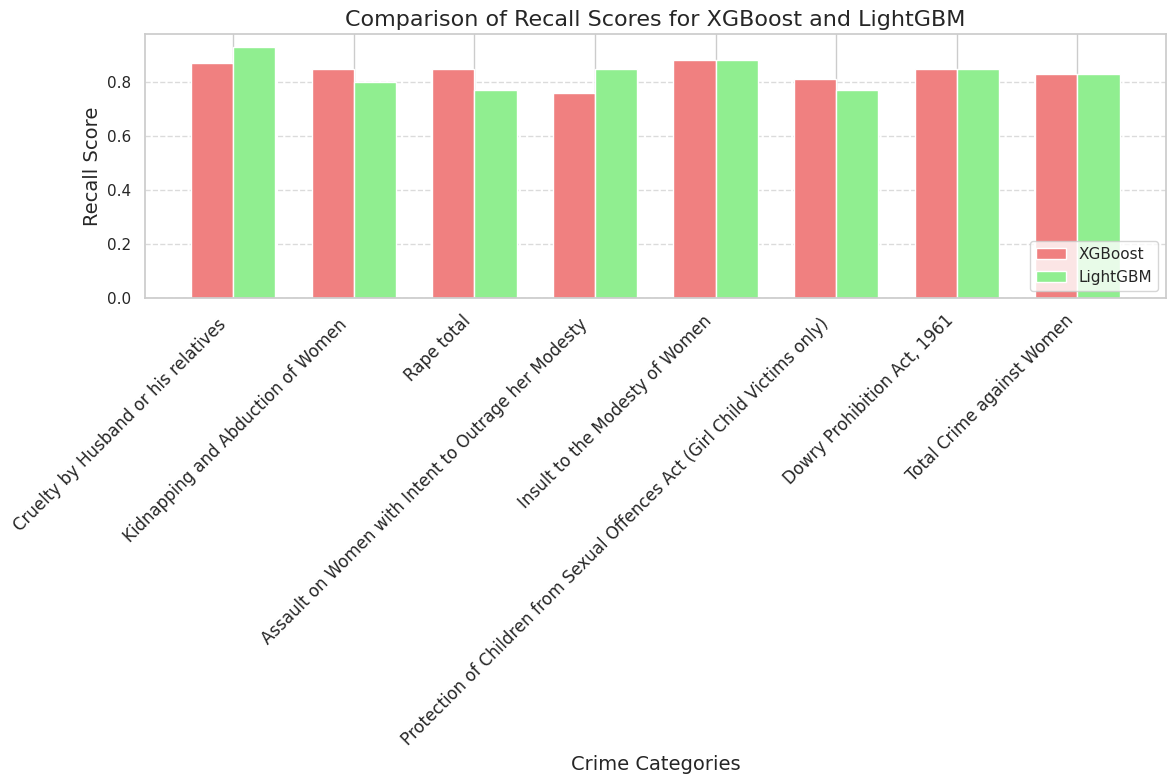

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example recall scores for XGBoost and LightGBM (replace these with your actual data)
recall_scores_xgb = {
    'Cruelty by Husband or his relatives ': 0.87,
    'Kidnapping and Abduction of Women ': 0.85,
    'Rape total': 0.85,
    'Assault on Women with Intent to Outrage her Modesty ': 0.76,
    'Insult to the Modesty of Women': 0.88,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 0.81,
    'Dowry Prohibition Act, 1961': 0.85,
    'Total Crime against Women': 0.83
}

recall_scores_lgb = {
    'Cruelty by Husband or his relatives ': 0.93,
    'Kidnapping and Abduction of Women ': 0.80,
    'Rape total': 0.77,
    'Assault on Women with Intent to Outrage her Modesty ': 0.85,
    'Insult to the Modesty of Women': 0.88,
    'Protection of Children from Sexual Offences Act (Girl Child Victims only) ': 0.77,
    'Dowry Prohibition Act, 1961': 0.85,
    'Total Crime against Women': 0.83
}

# Crimes to compare
crime_categories = list(recall_scores_xgb.keys())

# Number of categories
n = len(crime_categories)

# Bar width
bar_width = 0.35

# Index for crime categories
index = np.arange(n)

# Creating the bar plots
plt.figure(figsize=(12, 8))

plt.bar(index, [recall_scores_xgb[crime] for crime in crime_categories], bar_width, label='XGBoost', color='lightcoral')
plt.bar(index + bar_width, [recall_scores_lgb[crime] for crime in crime_categories], bar_width, label='LightGBM', color='lightgreen')

# Adding labels
plt.xlabel('Crime Categories', fontsize=14)
plt.ylabel('Recall Score', fontsize=14)
plt.title('Comparison of Recall Scores for XGBoost and LightGBM', fontsize=16)
plt.xticks(index + bar_width / 2, crime_categories, rotation=45, ha="right", fontsize=12)
plt.legend(loc='lower right')

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Show plot
plt.show()
